##  Initiation à l'architecture de modèle du transformateur

Le langage est l'essence de la communication humaine. Les civilisations ne seraient jamais nées sans les séquences de mots qui forment le langage. Nous vivons désormais principalement dans un monde de représentations numériques du langage. Notre vie quotidienne repose sur les fonctions linguistiques numérisées du traitement du langage naturel (NLP) : moteurs de recherche Web, e-mails, réseaux sociaux, publications, tweets, SMS sur smartphone, traductions, pages Web, synthèse vocale sur les sites de streaming pour les transcriptions, -discours sur les services de hotline, et bien d'autres fonctions quotidiennes.

En décembre 2017, le séminal Vaswani et al. L'article Attention Is All You Need, écrit par les membres de Google Brain et Google Research, a été publié. Le Transformateur était né. Le Transformer a surpassé les modèles NLP de pointe existants. Le Transformer s'est entraîné plus rapidement que les architectures précédentes et a obtenu des résultats d'évaluation plus élevés. Les transformateurs sont devenus un élément clé de NLP

Le monde numérique n'aurait jamais existé sans la NLP. Le traitement du langage naturel serait resté primitif et inefficace sans l'intelligence artificielle. Cependant, l'utilisation de réseaux de neurones récurrents (RNN) et de réseaux de neurones convolutifs (CNN) a un coût énorme en termes de calculs et de puissance de la machine.

Dans ce guide, nous commencerons par le contexte de NLP qui a conduit à l'essor du Transformer. Nous passerons brièvement des premiers NLP aux RNN et CNN. Ensuite, nous verrons comment le Transformer a renversé le règne des RNN et des CNN, qui avait prévalu pendant des décennies pour l'analyse de séquences.

## L'ascension du Transformer : l'attention est tout ce dont vous avez besoin

En décembre 2017, Vaswani et al. ont publié leur article fondateur, Attention Is All You Need. Ils ont effectué leur travail chez Google Research et Google Brain. Je me référerai au modèle décrit dans Attention Is All You Need comme le "modèle Transformer original" tout au long de ce guide . 

Dans cette section, nous examinerons le modèle Transformer qu'ils ont construit de l'extérieur.

 Dans les sections suivantes, nous allons explorer ce qu'il y a à l'intérieur de chaque composant du modèle. Le modèle Transformer original est un empilement de 6 couches. La sortie de la couche l est l'entrée de la couche l+1 jusqu'à ce que la prédiction finale soit atteinte. Il y a une pile d'encodeurs à 6 couches sur la gauche et une pile de décodeurs à 6 couches sur la droite

 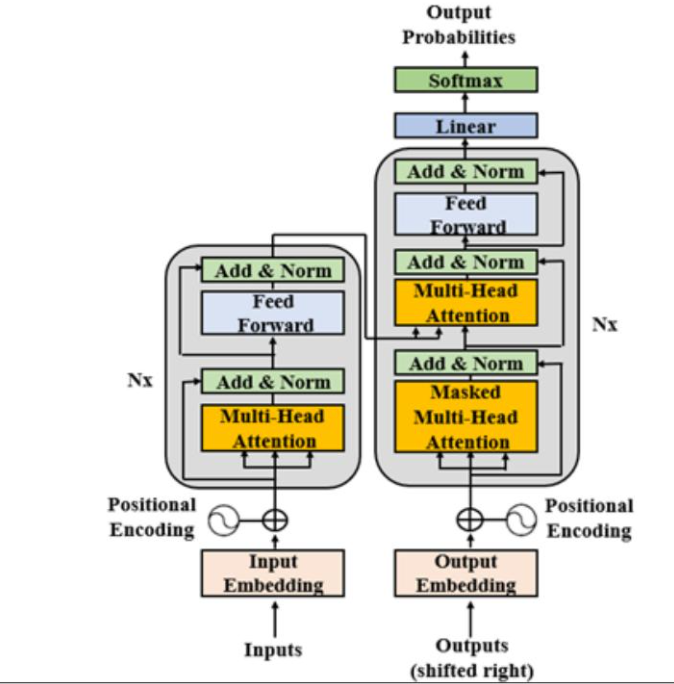

Sur la gauche, les entrées entrent du côté encodeur du transformateur via une sous-couche d'attention et une sous-couche FeedForward Network (FFN). Sur la droite, les sorties cibles entrent dans le côté décodeur du transformateur à travers deux sous-couches d'attention et une sous-couche FFN. Nous remarquons immédiatement qu'il n'y a pas de RNN, LSTM ou CNN. La récurrence a été abandonnée.

L'attention a remplacé la récurrence, qui nécessite un nombre croissant d'opérations à mesure que la distance entre deux mots augmente. Le mécanisme d'attention est une opération "mot à mot". Le mécanisme d'attention trouvera comment chaque mot est lié à tous les autres mots d'une séquence, y compris le mot lui-même analysé. Examinons la séquence suivante.

    The cat sat on the mat.

L'attention exécutera des produits scalaires entre les vecteurs de mots et déterminera les relations les plus fortes d'un mot parmi tous les autres mots, y compris lui-même ("chat" et "chat")

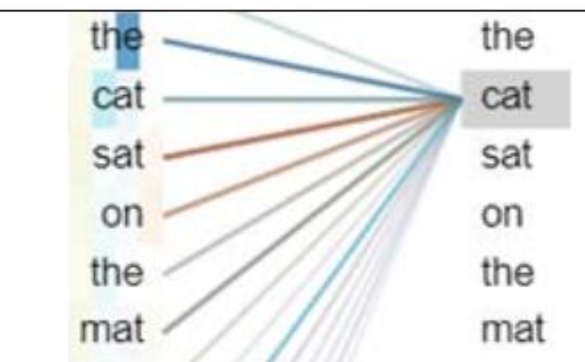

Le mécanisme d'attention fournira une relation plus profonde entre les mots et produira de meilleurs résultats. 

Pour chaque sous-couche d'attention, le modèle Transformer d'origine exécute non pas un mais huit mécanismes d'attention en parallèle pour accélérer les calculs. Nous explorerons cette architecture dans la section suivante, La pile d'encodeur. Ce processus est nommé « multi head attention », fournissant :

*  Une analyse plus approfondie et plus approfondie des séquences
* L'exclusion des opérations de calcul réduisant la récurrence
*  La mise en œuvre de la parallélisation, ce qui réduit le temps d'apprentissage
* Chaque mécanisme d'attention apprend différentes perspectives du même séquence d'entrée


Nous venons de regarder le Transformer de l'extérieur. Passons maintenant à chaque composant du Transformer. Nous allons commencer par l'encodeur.

## encoder

Les couches de l'encodeur et du décodeur du modèle Transformer d'origine sont des piles de couches. Chaque couche de la pile d'encodeurs a la structure suivante:

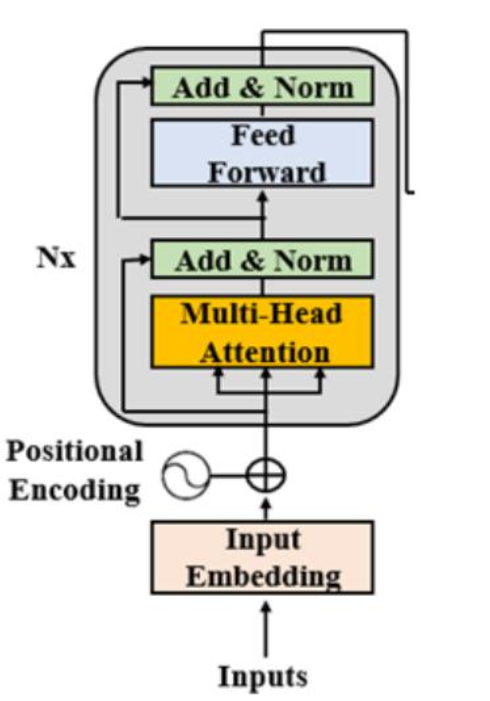

La structure de couche d'encodeur d'origine reste la même pour toutes les couches N=6 du modèle Transformer. Chaque couche contient deux sous-couches principales : un mécanisme multi-headed attention  et un feedforward network  entièrement connecté


Notez qu'une connexion résiduelle entoure chaque sous-couche principale, Sublayer(x), dans le modèle Transformer. Ces connexions transportent l'entrée x non traitée d'une sous-couche vers une fonction de normalisation de couche. De cette façon, nous sommes certains que les informations clés telles que l'encodage positionnel ne sont pas perdues en cours de route. La sortie normalisée de chaque couche est donc

    LayerNormalization (x + Sublayer(x))


Bien que la structure de chacune des N=6 couches du codeur soit identique, le contenu de chaque couche n'est pas strictement identique à la couche précédente. 

Par exemple, la sous-couche d'encastrement n'est présente qu'au niveau bas de la pile. Les cinq autres couches ne contiennent pas de couche d'intégration, ce qui garantit que l'entrée codée est stable à travers toutes les couches


De plus, les mécanismes d'attention multi-têtes remplissent les mêmes fonctions de la couche 1 à 6. Cependant, ils n'effectuent pas les mêmes tâches. Chaque couche apprend de la couche précédente et explore différentes manières d'associer les jetons dans la séquence. Il recherche diverses associations de mots, tout comme nous recherchons différentes associations de lettres et de mots lorsque nous résolvons un jeu de mots croisés.


Les concepteurs du Transformer ont introduit une contrainte très efficace. La sortie de chaque sous-couche du modèle a une dimension constante, y compris la couche d'intégration et les connexions résiduelles. Cette dimension est $d_{model}$ et peut être définie sur une autre valeur en fonction de vos objectifs. Dans l'architecture originale de Transformer, $d_{model} =512$


$d_{model}$ a une conséquence puissante. Pratiquement toutes les opérations clés sont des produits scalaires. Les dimensions restent stables, ce qui réduit le nombre d'opérations à calculer, réduit la consommation de la machine et facilite la traçabilité de l'information au fur et à mesure de son parcours dans le modèle. 

Cette vue globale de l'encodeur montre l'architecture très optimisée du Transformer. Dans les sections suivantes, nous allons zoomer sur chacune des sous-couches et des mécanismes. Nous commencerons par la sous-couche d'intégration



## Input embedding

La sous-couche d'intégration d'entrée convertit les jetons d'entrée en vecteurs de dimension $d_{model} = 512$ à l'aide d'intégrations apprises dans le modèle Transformer d'origine. La structure du plongement d'entrée est classique.

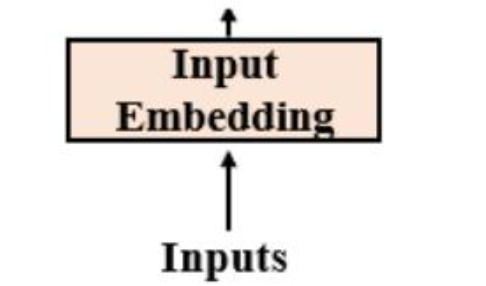

La sous-couche d'intégration fonctionne comme les autres modèles de transduction standard. Un tokenizer transformera une phrase en tokens. Chaque tokenizer a ses méthodes, mais les résultats sont similaires. Par exemple, un tokenizer appliqué à la séquence "le Transformer est un modèle PNL innovant !" produira les jetons suivants dans un type de modèle

In [ ]:
['the', 'transform', 'er', 'is', 'a', 'revolutionary', 'n', 'l', 'p', 'model', '!']

['the',
 'transform',
 'er',
 'is',
 'a',
 'revolutionary',
 'n',
 'l',
 'p',
 'model',
 '!']

Vous remarquerez que ce tokenizer a normalisé la chaîne en minuscules et l'a tronquée en sous-parties. Un tokenizer fournira généralement une représentation entière qui sera utilisée pour le processus d'intégration. Par exemple

In [ ]:
Text = "The cat slept on the couch.It was too tired to get up."
tokenized text= [1996, 4937, 7771, 2006, 1996, 6411, 1012, 2009, 2001, 2205, 5458, 2000, 2131, 2039, 1012]

Il n'y a pas assez d'informations dans le texte tokenisé à ce stade pour aller plus loin. Le texte marqué doit être incorporé. 

Le Transformer contient une sous-couche d'incorporation apprise. De nombreuses méthodes d'intégration peuvent être appliquées à l'entrée tokenisée. 

J'ai choisi l'architecture skip-gram de l'approche d'intégration word2vec mise à disposition par Google en 2013 pour illustrer la sous-couche d'intégration du Transformer. Un skip-gram se concentrera sur un mot central dans une fenêtre de mots et prédit les mots de contexte. Par exemple, si mot(i) est le mot central dans une fenêtre en deux étapes, un modèle de skip-gram analysera mot(i-2), mot(i-1), mot(i+1) et mot( i+2). Ensuite, la fenêtre va glisser et répéter le processus. Un modèle skip-gram contient généralement une couche d'entrée, des poids, une couche cachée et une sortie contenant les incorporations de mots des mots d'entrée tokenisés. Supposons que nous ayons besoin d'effectuer l'incorporation pour la phrase suivante.

    The black cat sat on the couch and the brown dog slept on the rug.




In [ ]:
import math
import numpy as np
import gensim 
from gensim.models import Word2Vec 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore') 


dprint=0 # prints outputs if set to 1, default=0

#‘text.txt’ file 
sample = ["The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug"]*1000

data = [] 
# sentence parsing 
for i in sample: 
	temp = [] 
	# tokenize the sentence into words 
	for j in i.split(): 
		temp.append(j.lower()) 
	data.append(temp) 

# Creating Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 512, window = 5, sg = 1)


Nous allons nous concentrer sur deux mots, black et brown. Le mot contenant les vecteurs de ces deux mots doit être similaire


Puisqu'il faut produire un vecteur de taille $d_{model} = 512$ pour chaque mot, nous obtiendrons un vecteur de plongement de taille 512 pour chaque mot


In [ ]:
word1='black'
word2='brown'

a=model2[word1]
b=model2[word2]

print(len(a))

512


Le mot black est maintenant représenté par 512 dimensions. D'autres méthodes d'intégration pourraient être utilisées et $d_{model} pourrait avoir un nombre de dimensions plus élevé Le mot intégration de brown est également représenté par 512 dimensions


Pour vérifier le plongement de mots produit pour ces deux mots, nous pouvons utiliser la similarité de cosinus pour voir si les plongements de mots des mots black et brown sont similaires. 

La similarité de cosinus utilise la norme euclidienne (L2) pour créer des vecteurs dans une sphère unité. Le produit scalaire des vecteurs que nous comparons est le cosinus entre les points de ces deux vecteurs. Pour en savoir plus sur la théorie de la similarité de cosinus, vous pouvez consulter la documentation de scikit-learn, parmi de nombreuses autres sources : https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity

La similarité de cosinus entre le vecteur black de taille  512 et vecteur brown de taille 512 dans l'encastrement de l'exemple est

In [ ]:


# compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)
print(cos)


0.98739654


Les couches suivantes du Transformer ne démarrent pas les mains vides. Ils ont appris des plongements de mots qui fournissent déjà des informations sur la façon dont les mots peuvent être associés. 

Cependant, une grande partie des informations manque car aucun vecteur ou information supplémentaire n'indique la position d'un mot dans une séquence.

Les concepteurs du Transformer ont proposé une autre fonctionnalité innovante : l'encodage positionnel. Voyons comment fonctionne l'encodage positionnel

## Encodage positionnel

Nous entrons dans cette fonction de codage positionnel du Transformer sans aucune idée de la position d'un mot dans une séquence

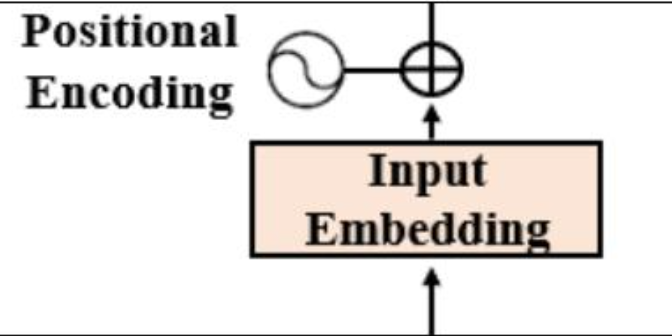


Considérez la phrase d'entrée que je suis bon. Dans les RNN, nous transmettons la phrase au réseau mot par mot. C'est-à-dire que d'abord le mot je est passé en entrée, ensuite le mot suis est passé, et ainsi de suite. Nous alimentons la phrase mot par mot afin que notre réseau comprenne la phrase complètement. Mais avec le réseau transformateur, on ne suit pas le mécanisme de récurrence. Ainsi, au lieu d'alimenter la phrase mot par mot, on alimente tous les mots de la phrase parallèlement au réseau. Nourrir les mots en parallèle aide à réduire le temps de formation et aide également à apprendre la dépendance à long terme.

Cependant, le problème est que puisque nous alimentons les mots parallèlement au transformateur, comment va-t-il comprendre le sens de la phrase si l'ordre des mots n'est pas conservé ? Pour comprendre la phrase, l'ordre des mots (position des mots dans la phrase) est important, non ? Oui, l'ordre des mots est très important car il aide à comprendre la position de chaque mot dans la phrase, ce qui aide à son tour à comprendre le sens de la phrase.

Nous ne pouvons pas créer de vecteurs positionnels indépendants qui auraient un coût élevé sur la vitesse d'entraînement du Transformer et rendraient les sous-couches d'attention très complexes à utiliser. L'idée est d'ajouter une valeur de codage positionnel à l'intégration d'entrée au lieu d'avoir des vecteurs supplémentaires pour décrire la position d'un jeton dans une séquence

Nous savons également que le Transformer attend un $d_{model}$ de taille fixe = 512 (ou une autre valeur constante pour le modèle) pour chaque vecteur de la sortie de la fonction d'encodage positionnel. 

Si nous revenons à la phrase que nous avons utilisée dans le mot embedding , nous pouvons voir que le black et le brown peuvent être similaires, mais ils sont éloignés

    The black cat sat on the couch and the brown dog slept on the rug.


Le mot black est en position 2, pos=2, et le mot brown est en position 10, pos=10

Notre problème est de trouver un moyen d'ajouter une valeur à l'incorporation de chaque mot afin qu'il contienne cette information. Cependant, nous devons ajouter une valeur au $d_{model} = 512$$ dimensions ! Pour chaque vecteur d'insertion de mot, nous devons trouver un moyen de fournir des informations à i dans la plage (0,512) dimensions du vecteur d'insertion de mot black et brown

Il existe de nombreuses façons d'atteindre cet objectif. Les concepteurs ont trouvé un moyen astucieux d'utiliser une sphère unitaire pour représenter l'encodage positionnel avec des valeurs sinus et cosinus qui resteront ainsi petites mais très utiles

Vaswani et al. (2017) fournissent des fonctions sinus et cosinus afin que nous puissions générer différentes fréquences pour l'encodage positionnel (PE) pour chaque position et chaque dimension i du dmodel = 512 du vecteur d'intégration de mots

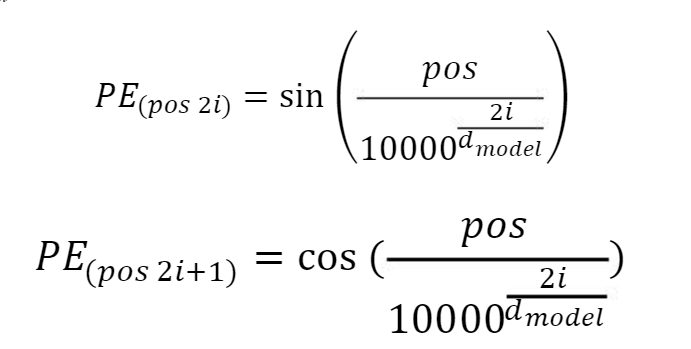

Si nous commençons au début du vecteur d'embedding de mots, nous commencerons par une constante (512), i=0, et finirons par i=511. Cela signifie que la fonction sinus sera appliquée aux nombres pairs et la fonction cosinus aux nombres impairs. Certaines implémentations le font différemment. Dans ce cas, le domaine de la fonction sinus peut être $i \in [0,255]$ et le domaine de la fonction cosinus peut être $ \in [256,512]$ . Cela produira des résultats similaires

Pour notre phrase donnée, I am good, first, d'abord, nous obtenons les plongements pour chaque mot dans notre phrase. Représentons la dimension d'intégration sous la forme $d_{model}$ . Supposons que la dimension d'intégration, , soit 4. Ensuite, notre dimension de matrice d'entrée sera [longueur de la phrase x dimension d'intégration] = [3 x 4]

Nous représentons notre phrase d'entrée en utilisant la matrice d'entrée X (matrice d'intégration). Soit la matrice X  d'entrée la suivante

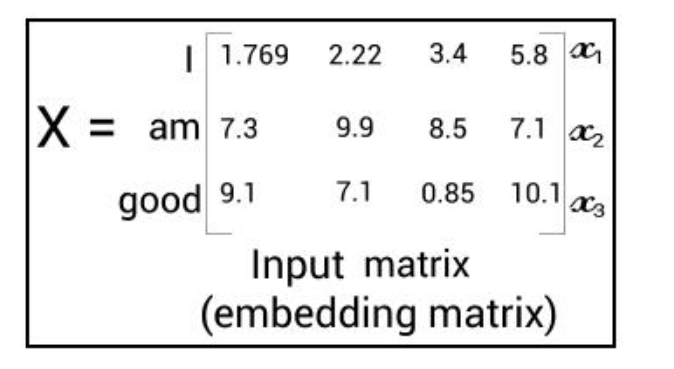

Maintenant, si nous passons la matrice d'entrée précédente directement au transformateur, il ne peut pas comprendre l'ordre des mots. Ainsi, au lieu de fournir la matrice d'entrée directement au transformateur, nous devons ajouter des informations indiquant l'ordre des mots (position du mot) afin que notre réseau puisse comprendre le sens de la phrase. Pour ce faire, nous introduisons une technique appelée encodage positionnel. L'encodage positionnel, comme son nom l'indique, est un codage indiquant la position du mot dans une phrase (ordre des mots)

La dimension de la matrice de codage positionnel $P$, , est la même dimension que la matrice d'entrée . Maintenant, avant de fournir directement la matrice  $X$ d'entrée (matrice d'intégration) au transformateur, nous incluons l'encodage positionnel. Ainsi, nous ajoutons simplement la matrice de codage positionnelle $P$ à la matrice d'intégration $X$, puis l'alimentons en entrée du réseau. Donc, maintenant notre matrice d'entrée aura non seulement l'intégration du mot mais aussi la position du mot dans la phrase

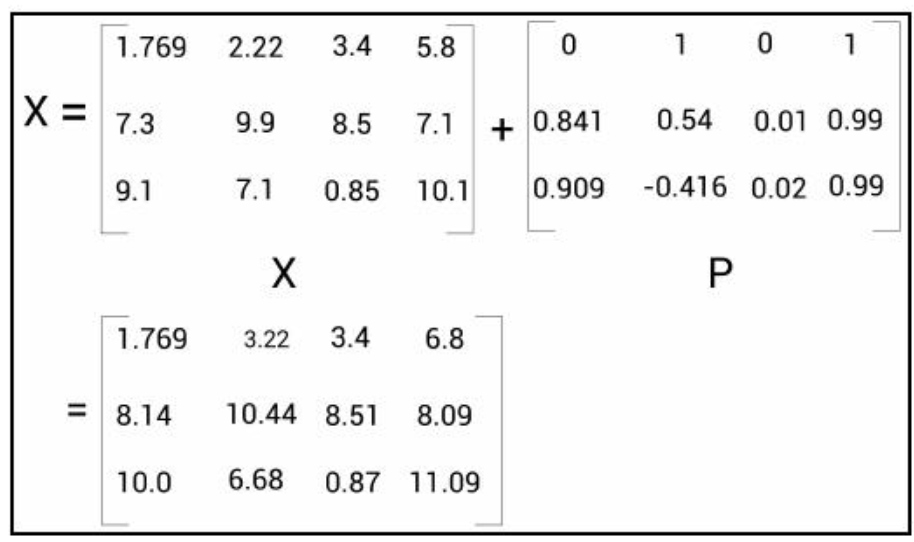


Dans l'équation précédente, implique la position du mot dans une phrase, et implique la position de embedding. Comprenons les équations précédentes avec un exemple. En utilisant les équations précédentes, nous pouvons écrire ce qui suit:

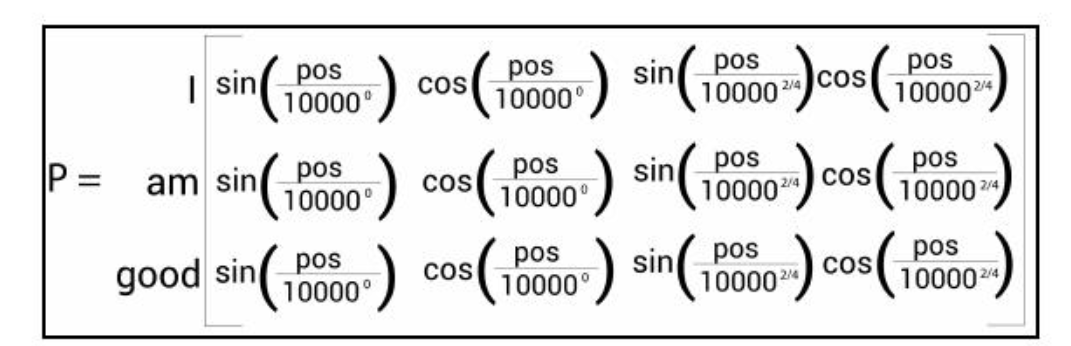

Comme on peut le constater à partir de la matrice précédente, dans le codage positionnel, on utilise la fonction sin quand i est pair et la fonction cos quand i est impair. En simplifiant la matrice précédente, on peut écrire la suivante:

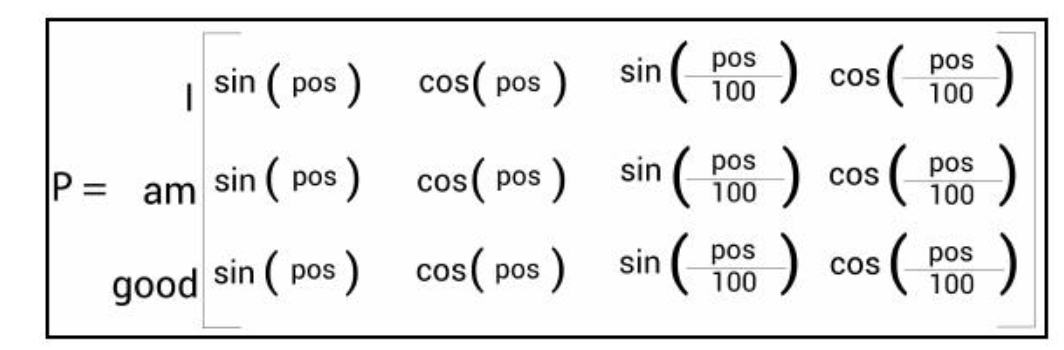

Nous savons que dans notre phrase d'entrée, le mot I est à la 0ème position, am à la 1ère position et good est à la 2ème position. En remplaçant la valeur, nous pouvons écrire ce qui suit:

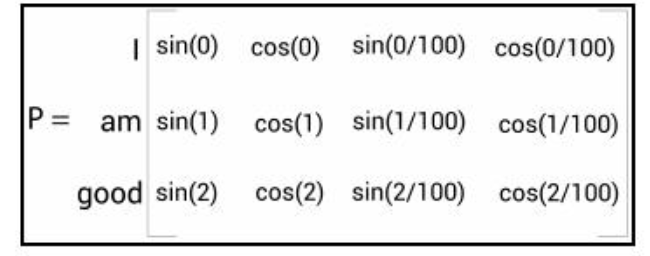

Ainsi, notre matrice de codage positionnelle P finale, , est donnée comme suit

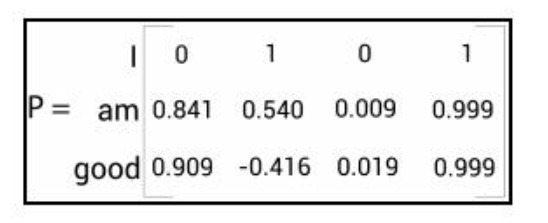

Revenons maintenant sur notre architecture d'encodeur. Un seul bloc codeur est illustré dans la figure suivante. Comme nous pouvons l'observer, avant de fournir l'entrée directement à l'encodeur, nous obtenons d'abord l'intégration d'entrée (matrice d'intégration), puis nous y ajoutons l'encodage positionnel, puis nous l'alimentons en entrée de l'encodeur

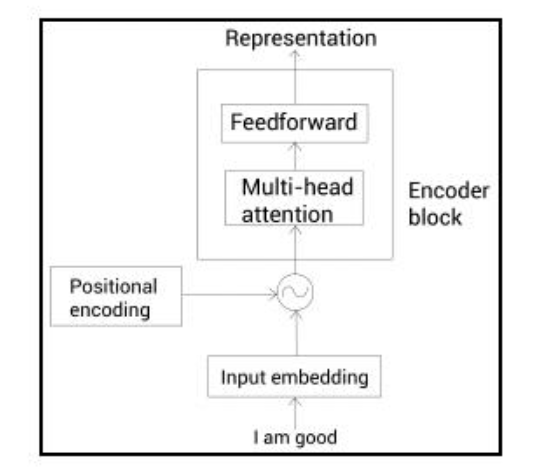

## Multi-head attention

La sous-couche d'attention multi-têtes contient huit têtes et est suivie d'une normalisation post-couche, qui ajoutera des connexions résiduelles à la sortie de la sous-couche et la normalisera

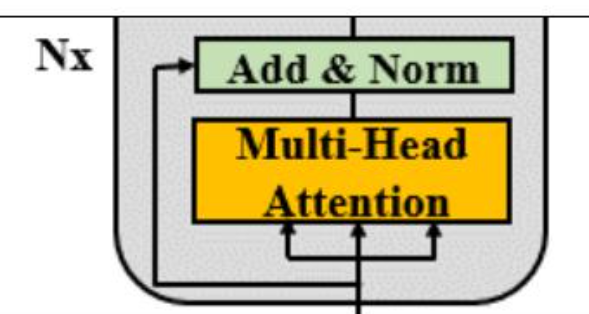

Cette section commence par l'architecture d'une couche d'attention. Ensuite, un exemple de multi-attention est implémenté dans un petit module en Python. Enfin, la normalisation post-couche est décrite. Commençons par l'architecture de l'attention multi-têtes

## L'architecture de Multi-head attention 

L'entrée de la sous-couche multi-attention de la première couche de la pile d'encodeur est un vecteur qui contient des embedding et l'encodage positionnel de chaque mot. Les couches suivantes de la pile ne recommencent pas ces opérations.

La dimension du vecteur de chaque mot $x_n$ d'une séquence d'entrée est $d_{model} = 512$

$$pe(x_n)=[d_1=9.09297407e-01, d_2=9.09297407e-01,.., d_512 = 1.00000000e+00]$$

La représentation de chaque mot $x_n$ est devenue un vecteur de dmodel = 512 dimensions.

Chaque mot est mappé à tous les autres mots pour déterminer comment il s'intègre dans une séquence.

Dans la phrase suivante, nous pouvons voir que "it" pourrait être lié à "cat" et "rug" dans la séquence

    Sequence =The cat sat on the rug and it was dry-cleaned.
  
Le modèle s'entraînera à découvrir si "it" est lié à "cat" ou "rug". Nous pourrions exécuter un calcul énorme en entraînant le modèle à l'aide du dmodel = 512 dimensions telles qu'elles sont actuellement

Cependant, nous n'obtiendrions qu'un seul point de vue à la fois en analysant la séquence avec un bloc dmodel. De plus, il faudrait un certain temps de calcul pour trouver d'autres perspectives


Une meilleure façon est de diviser le dmodel = 512 dimensions de chaque mot $x_n$ de x (tous les mots d'une séquence) en 8 $d_k = 64$ dimensions.

Nous pouvons ensuite exécuter les 8 "têtes" en parallèle pour accélérer l'apprentissage et obtenir 8 sous-espaces de représentation différents de la façon dont chaque mot se rapporte à un autre.

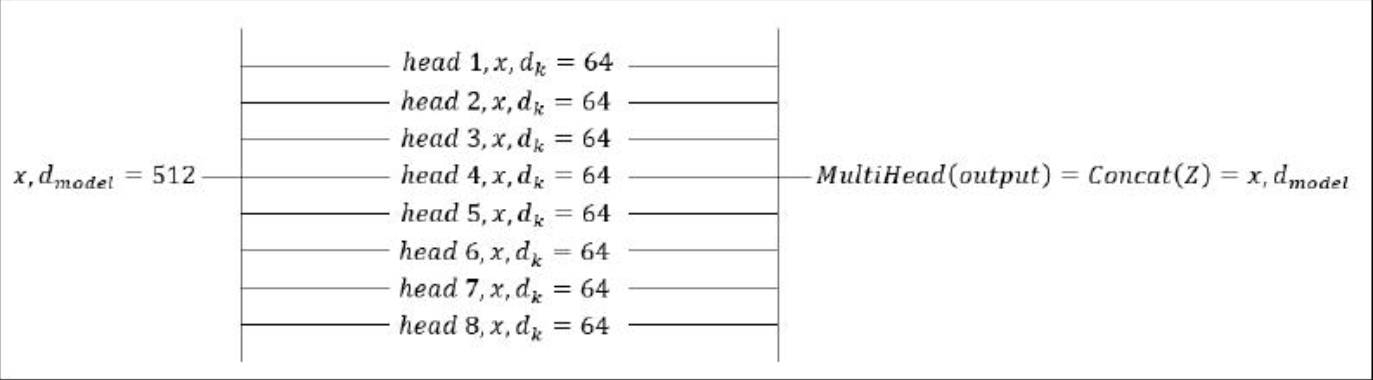




Vous pouvez voir qu'il y a maintenant 8 têtes fonctionnant en parallèle. Une tête pourrait décider que "it" va bien avec "cat" et une autre que "it" va bien avec "rug" et une autre que "rug" va bien avec "dry-cleaned".

La sortie de chaque tête est une matrice $z_i$ de forme x* $d_k$ La sortie d'une tête multi-attention est Z dénie comme:

$$ Z= (z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7,)$$

Cependant, $Z$ doit être concaténé pour que la sortie de la sous-couche multi-têtes ne soit pas une séquence de dimensions mais une ligne de matrice xm*$d_{model}$

Avant de sortir de la sous-couche attention multi-têtes, les éléments de Z sont concaténés:

$$MultiHead(output) = Concat(z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7,) = x, d_{model}$$

Notez que chaque tête est concaténée en $z$ qui a une dimension de dmodel = 512. La sortie de la couche multi-têtes respecte la contrainte du modèle Transformer d'origine. 

À l'intérieur de chaque tête $h_n$ du mécanisme d'attention, chaque mot vecteur a trois représentations


* Un vecteur de requête (query) (Q) qui a une dimension de $d_q = 64$, qui est activé et entraîné lorsqu'un vecteur de mots $x_n$ recherche toutes les paires clé-valeur des autres vecteurs de mots, y compris lui-même dans self-attention

• Un vecteur clé(key) ( K) qui a une dimension de $d_k = 64^$, qui sera entraîné pour fournir une valeur d'attention

* Un vecteur de valeur (value) (V) qui a une dimension de $d_v = 64$, qui sera entraîné pour fournir une autre valeur d'attention


L'attention est définie comme une « attention scalée sur les produits scalaires », qui est représentée dans l'équation suivante dans laquelle nous insérons Q, K et V :

 $$Attention(Q, K, V) = Softamac(\frac{QK^T}{\sqrt d_k})V$$


Les vecteurs ont tous la même dimension, ce qui rend relativement simple l'utilisation d'un produit scalaire mis à l'échelle pour obtenir les valeurs d'attention pour chaque tête, puis concaténer la sortie $Z$ des 8 têtes


Pour obtenir Q, K et V, nous devons entraîner le modèle avec leurs matrices de poids respectives $Q_w$, $K_w$ et $V_w$, qui ont $d_k = 64$ colonnes et $d_{model} = 512$ lignes. Par exemple, Q est obtenu par un produit scalaire entre x et Q_w. Q aura une dimension de $d_k = 64$


Hugging Face et Google Brain Trax, entre autres, fournissent des frameworks, des bibliothèques et des modules prêts à l'emploi que nous utiliserons tout au long de ce guide. 

Cependant, ouvrons le capot du modèle Transformer et mettons la main à la pâte en Python pour illustrer l'architecture que nous venons d'explorer afin de visualiser le modèle dans le code et de le montrer avec des images intermédiaires.


Nous utiliserons du code Python de base avec uniquement numpy et une fonction softmax en 10 étapes pour exécuter les aspects clés du mécanisme d'attention.

Commençons maintenant à construire Étape 1 de notre modèle pour représenter l'entrée.


Mais pourquoi devons-nous faire cela ? Comprendre comment un mot est lié à tous les mots de la phrase nous aide à apprendre une meilleure représentation. Maintenant, apprenons comment le mécanisme d'self-attention relie un mot à tous les mots de la phrase à l'aide des matrices de requête, de clé et de valeur.


## Étape 1 : Représentation de l'entrée

Nous commencerons par n'utiliser que des fonctions Python minimales pour comprendre le Transformer à un niveau inférieur avec le fonctionnement interne d'une tête d'attention. Nous explorerons le fonctionnement interne de la sous-couche d'attention multi-têtes à l'aide du code de base

In [ ]:
import numpy as np
from scipy.special import softmax

L'entrée du mécanisme d'attention que nous construisons est réduite à $d_{model} = 4$ au lieu de $d_{model} = 512$. Cela ramène les dimensions du vecteur d'une entrée $X$ à $d_{model} = 4$, ce qui est plus facile à visualiser.

$X$ contient 3 entrées avec 4 dimensions chacune au lieu de 512

In [ ]:

print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


La sortie montre que nous avons 3 vecteurs de $d_{model} = 4$

La première étape de notre modèle est prête :

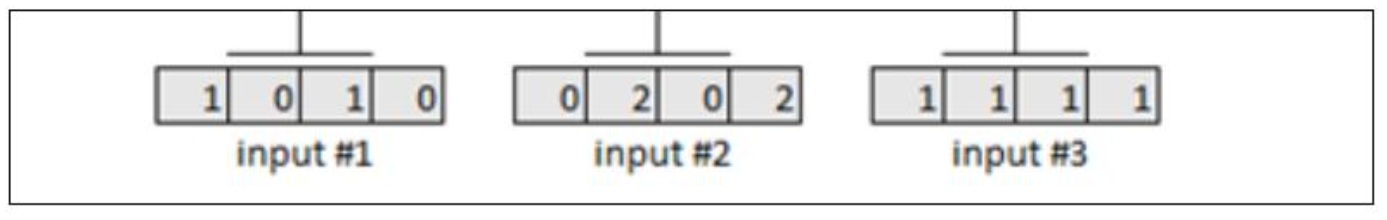

## Étape 2 : Initialisation les matrices de poids

Chaque entrée a 3 matrices de poids :

* $Q_w$ pour entraîner les requêtes(queries)
*  $K_w$ pour entraîner les clés(Keys)
* $V_w$ pour entraîner les valeurs (Values)

Ces 3 matrices de poids seront appliquées à toutes les entrées de ce modèle. Les matrices de poids décrites par Vaswani et al. (2017) sont $d_k = 64$ dimensions. 

Cependant, réduisons les matrices à $d_k = 3$. Les dimensions sont réduites à $3*4$ matrices de poids pour pouvoir visualiser plus facilement les résultats intermédiaires et effectuer des produits scalaires avec l'entrée $X$. Les trois matrices de poids sont initialisées en commençant par la matrice de pondération de la requête :

In [ ]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


# Nous allons maintenant initialiser la matrice de poids clé

In [ ]:
print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


Enfin, nous initialisons la matrice de poids des valeurs

In [ ]:

print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


La deuxième étape de notre modèle est prête :

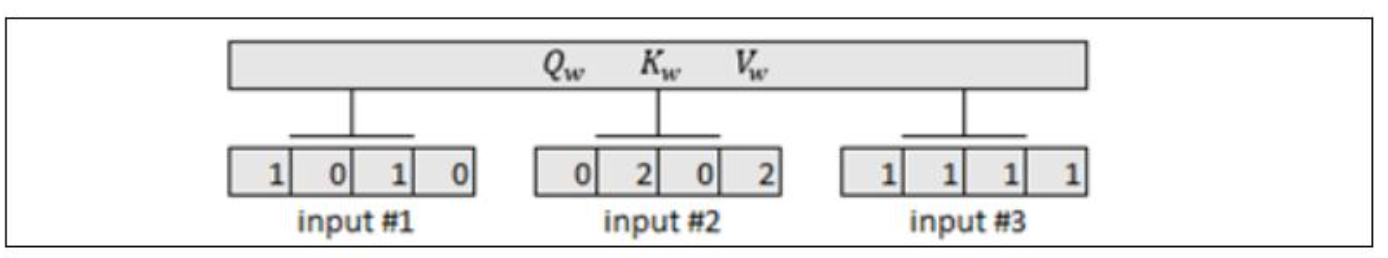



Nous allons maintenant multiplier les poids par les vecteurs d'entrée pour obtenir Q, K et V

## Étape 3 : multiplication matricielle pour obtenir Q, K, V

Nous allons maintenant multiplier les vecteurs d'entrée par les matrices de poids pour obtenir un vecteur de requête, de clé et de valeur pour chaque entrée. 

Dans ce modèle, nous supposerons qu'il existe une matrice de poids w_query, w_key et w_value pour toutes les entrées. 

D'autres approches sont possibles. Commençons par multiplier les vecteurs d'entrée par la matrice de poids w_query

In [ ]:

print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [ ]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


La troisième étape de notre modèle est prête :


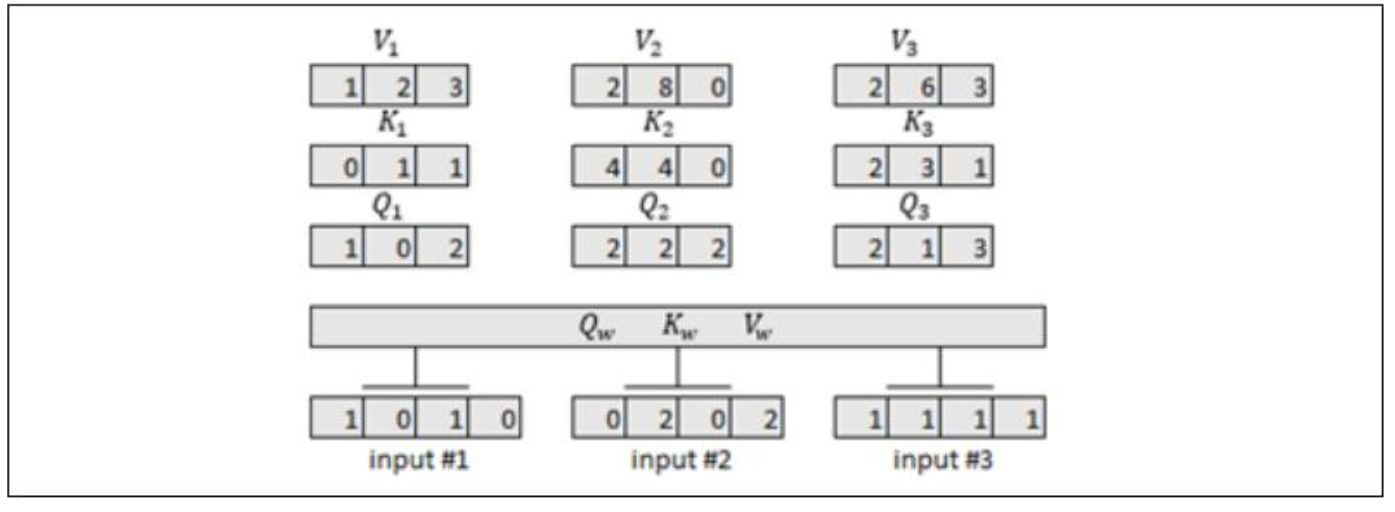

Nous avons les valeurs Q, K et V dont nous avons besoin pour calculer les scores d'attention

## Étape 4 : Scores d'attention 

La tête d'attention implémente maintenant l'équation originale de Transformer :
$$Attention(Q, K, V) = Softamac(\frac{QK^T}{\sqrt d_k})V$$


Étape 4 se concentre sur Q et K :

$$(\frac{QK^T}{\sqrt d_k})$$

Pour ce modèle, nous allons arrondir $\sqrt d_k=\sqrt 3=1.75$ à $1$


Mais à quoi sert de calculer le produit scalaire entre la requête et les matrices clés ? Que signifie exactement ?

Le calcul du produit scalaire entre deux vecteurs nous indique à quel point ils sont similaires.

Ainsi, le calcul du produit scalaire entre le vecteur de requête et les vecteurs clés nous indique à quel point le vecteur de requête sont similaire à tous les vecteurs clés.


L'étape suivante du mécanisme de self-attention consiste à diviser la matrice par la racine carrée de la dimension du vecteur clé. Mais pourquoi devons-nous faire cela ? Ceci est utile pour obtenir des gradients stables

In [ ]:
print("Step 4: Scaled Attention Scores")
k_d = 1   #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


L'étape 4 est maintenant terminée. Par exemple, le score pour x1 est [2,4,4] sur les K vecteurs à travers la tête comme affiché :

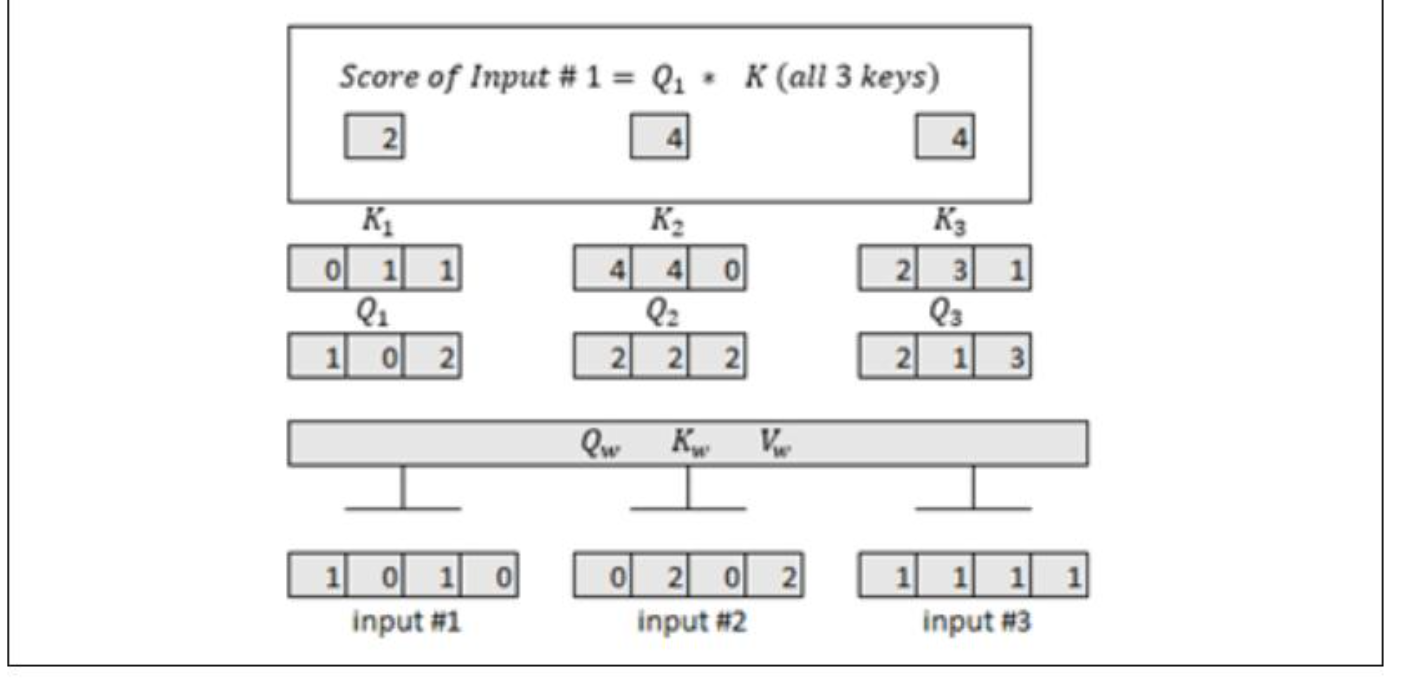

## Étape 5 : Scores d'attention softmax pour chaque vecteur

Nous appliquons maintenant une fonction softmax à chaque score d'attention intermédiaire. Au lieu de faire une multiplication matricielle, zoomons sur chaque vecteur individuel.

En regardant les scores de similarité précédents, on peut comprendre qu'ils sont sous la forme non normalisée. Nous les normalisons donc à l'aide de la fonction softmax. L'application de la fonction softmax aide à amener le score dans la plage de 0 à 1 et la somme des scores est égale à 1.

On peut appeler la matrice précédente une matrice de score. À l'aide de ces scores, nous pouvons comprendre comment chaque mot de la phrase est lié à tous les mots de la phrase.

In [ ]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


L'étape 5 est maintenant terminée. Par exemple, le softmax du score de x1 pour toutes les touches est

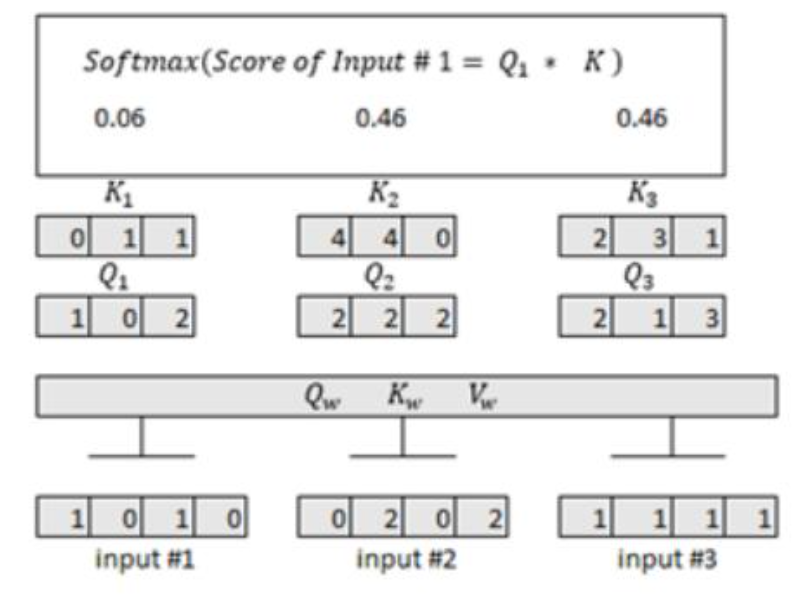

## Étape 6 : Les représentations finales de l'attention

Nous pouvons maintenant finaliser l'équation de l'attention en branchant V

$$Attention(Q, K, V) = Softamac(\frac{QK^T}{\sqrt d_k})V$$

Nous avons calculé le produit scalaire entre la requête et les matrices clés, obtenu les scores, puis normalisé les scores avec la fonction softmax.

Maintenant, dans cet étape consiste à calculer la matrice d'attention. La matrice d'attention contient les valeurs d'attention pour chaque mot de la phrase. Nous pouvons calculer la matrice d'attention, , en multipliant la matrice de score, , par la matrice de valeurs.


Nous allons d'abord calculer le score d'attention de l'entrée $x1$ pour les étapes 6 et 7. Nous calculons une valeur d'attention pour un vecteur de mot. Lorsque nous atteignons l'étape 8, nous généraliserons le calcul de l'attention aux deux autres vecteurs d'entrée. Pour obtenir l'attention (Q,K,V) pour x1, nous multiplions le score d'attention intermédiaire par les 3 vecteurs de valeur un par un pour zoomer le fonctionnement interne de l'équation



In [ ]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


La matrice d'attention, est calculée en faisant la somme des vecteurs de valeurs pondérés par les scores.

## Etape 7 : Somme des résultats


Les 3 valeurs d'attention de l'entrée #1 obtenues vont maintenant être additionnées pour obtenir la première ligne de la matrice de sortie.

In [ ]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


A partir d'exemple précédente, on comprend que , self-attention du mot x1 est calculée comme la somme des vecteurs de valeurs pondérés par les scores. 

Mais en quoi est-ce utile ? Pour répondre à cette question, faisons un petit détour par l'exemple de phrase que nous avons vu plus tôt, adog ate th food because it was hungry mangé . Ici, le mot it indique dog. Pour calculer l'self-attention du mot it, nous suivons les mêmes étapes précédentes. Supposons que nous ayons ce qui suit

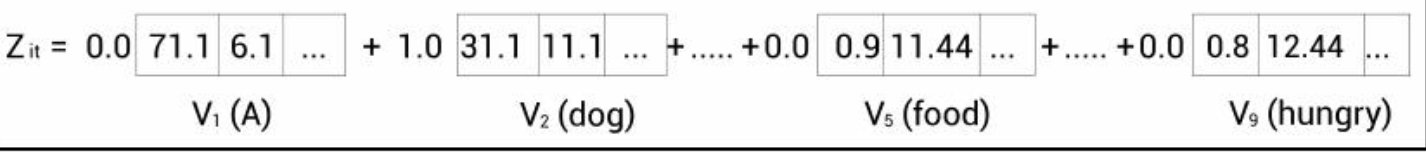

A partir de la figure précédente, nous pouvons comprendre que la valeur de self-attention du mot it contient 100% des valeurs du vecteur de valeur $v2$ dog. Cela aide le modèle à comprendre que le mot it fait référence en fait à un dog et non au mot food. Ainsi, en utilisant un mécanisme d'auto-attention, nous pouvons comprendre comment le mot it  est lié à tous les autres mots de cette phrase

## Étape 8 : Étapes 1 à 7 pour toutes les entrées

Le Transformer peut maintenant produire les valeurs d'attention de l'entrée #2 et de l'entrée #3 en utilisant la même méthode décrite de l'étape 1 à l'étape 7 pour une tête d'attention


À partir de cette étape, nous supposerons que nous avons 3 valeurs d'attention avec des poids appris avec $d_{model} = 64$. Nous voulons maintenant voir à quoi ressemblent les dimensions d'origine lorsqu'elles atteignent la sortie de la sous-couche. 

Nous avons vu le processus de représentation de l'attention en détail avec un petit modèle. Allons directement au résultat et supposons que nous ayons généré les 3 représentations de l'attention avec une dimension de $d_{model} = 64$


La sortie suivante affiche la simulation de z0, qui représente les 3 vecteurs de sortie de dmodel = 64 dimensions pour la tête 1 :



In [ ]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.8399785  0.03092513 0.07955612 0.74457887 0.88500535 0.31606897
  0.62171359 0.26812404 0.73386509 0.08475476 0.85210947 0.8670823
  0.97340714 0.13501492 0.12869556 0.27340709 0.29975294 0.24336263
  0.69225702 0.72379117 0.2458799  0.04418754 0.1477949  0.9864251
  0.34351148 0.13632755 0.45122415 0.64915203 0.33974728 0.86698374
  0.03870908 0.51697415 0.76301301 0.04438307 0.46922921 0.22683169
  0.3700685  0.20169927 0.91956937 0.00812157 0.07914471 0.929371
  0.68910547 0.35760036 0.35967817 0.96642741 0.56310855 0.90207066
  0.31777427 0.25844325 0.18066637 0.9594933  0.58239879 0.47956641
  0.90999081 0.26974866 0.84371544 0.93193266 0.52551675 0.7960407
  0.61952177 0.07929365 0.00321457 0.7337403 ]
 [0.98921874 0.69294676 0.67931605 0.74526659 0.15766845 0.05371155
  0.85082987 0.76845619 0.25122817 0.66817173 0.98841427 0.19285345
  0.06542136 0.8236087  0.00932198 0.74686189 0.35544558 0.37448329
  0.54338679 0.74395991 0.03025446 0

Les résultats varient lorsque vous exécutez le notebook en raison de la génération aléatoire des vecteurs. 

Le Transformer dispose désormais des vecteurs de sortie pour les entrées d'une tête. 

L'étape suivante consiste à générer les sorties des 8 têtes pour créer la sortie finale de la sous-couche d'attention

## Étape 9 : La sortie des têtes de la sous-couche attention

Au lieu d'avoir une seule tête d'attention, nous pouvons utiliser plusieurs têtes d'attention. C'est-à-dire que dans la section précédente, nous avons appris à calculer la matrice d'attention, . Au lieu de calculer une seule matrice d'attention, 

Nous supposons que nous avons entraîné les 8 têtes de la sous-couche attention. Le transformateur a maintenant 3 vecteurs de sortie (des 3 vecteurs d'entrée qui sont des mots ou des morceaux de mots) de dmodel = 64 dimensions chacun

In [ ]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512


Les 8 têtes ont maintenant produit Z:

$$Z = (z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7,)$$ 

Le Transformer va maintenant concaténer les 8 éléments de Z pour la sortie finale du sous-attention multi-têtes -couche


Mais à quoi sert le calcul de plusieurs matrices d'attention ? Comprenons cela avec un exemple. Considérez la phrase **all is well**. Disons que nous devons bien calculer self-attention du mot. Après avoir calculé le score de similarité, supposons que nous avons la sortie suivante:

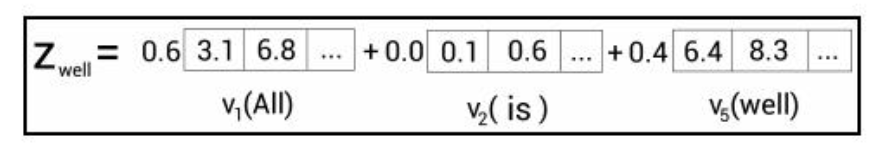





Comme on peut le constater à partir de la figure précédente, la valeur de self-attention du mot well est la somme des vecteurs de valeurs pondérés par les scores. Si vous regardez attentivement la figure précédente, la valeur d'attention du mot well est dominée par l'autre mot all. Autrement dit, puisque nous multiplions le vecteur de valeur du mot All par 0,6 et le vecteur de valeur du mot well par seulement 0,4, cela implique que $z_{well}$ contiendra 60% des valeurs du vecteur de valeur du mot All et seulement 40% des valeurs du vecteur de valeur du well de mots réel. Ainsi, ici la valeur d'attention du mot well est dominée par l'autre mot All

Cela ne sera utile que dans des circonstances où le sens du mot réel est ambigu. C'est-à-dire, considérons la phrase suivante.

    A dog ate the food because it was hungry

Disons que nous calculons l'self-attention pour le mot elle. Après avoir calculé le score de similarité, supposons que nous ayons ce qui suit:

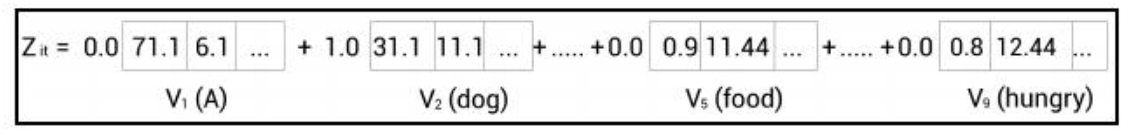

Comme on peut le constater à partir de l'équation précédente, ici la valeur d'attention du mot it est juste le vecteur de valeur du mot dog. Ici, la valeur d'attention du mot lui-même est dominée par le mot dog. Mais c'est bien ici car le sens du mot est ambigu car il peut se référer au dog ou au food.


Ainsi, si le vecteur de valeur d'autres mots domine le mot réel dans les cas illustrés dans l'exemple précédent, où le mot réel est ambigu, alors cette domination est utile ; sinon, cela posera un problème pour comprendre le bon sens du mot. Ainsi, afin de nous assurer que nos résultats sont exacts, au lieu de calculer une seule matrice d'attention, nous calculerons plusieurs matrices d'attention, puis concaténerons leurs résultats. L'idée derrière l'utilisation de l'attention multi-têtes est qu'au lieu d'utiliser une seule tête d'attention, si nous utilisons plusieurs têtes d'attention, alors notre matrice d'attention sera plus précise.

## Étape 10 : Concaténation de la sortie des têtes

Le Transformer concatène les 8 éléments de Z:

$$MultiHead(output) = Concat(z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7,)$W^0 = x, d_{model}$$

Notez que Z est multiplié par W0, qui est une matrice de poids qui est également entraînée. Dans ce modèle, nous supposerons que W0 est entraîné et intégré dans la fonction de concaténation. z0 à z7 est concanté

In [ ]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
[[0.36982318 0.20481378 0.59091026 ... 0.66511015 0.7904101  0.14097552]
 [0.75651687 0.8022566  0.4079412  ... 0.42133331 0.32611237 0.87937622]
 [0.69383746 0.56061569 0.40176716 ... 0.09589457 0.76207872 0.33737928]]


## Normalisation post-couche

Chaque sous-couche d'attention et chaque sous-couche feedforward du Transformer est suivie d'une normalisation post-couche (Post-LN)

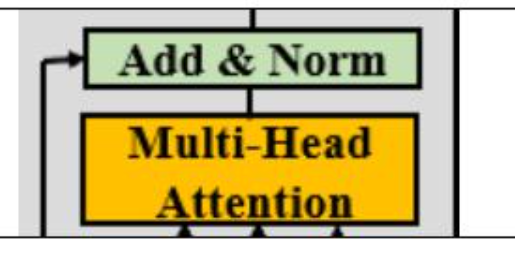

Le Post-LN contient une fonction d'ajout et un processus de normalisation de couche. La fonction add traite les connexions résiduelles provenant de l'entrée de la sous-couche. 

L'objectif des connexions résiduelles est de s'assurer que les informations critiques ne sont pas perdues. Le Post-LN ou normalisation de couche peut ainsi être décrit comme suit

$$LayerNorm(x+Sublayer(x))$$

Le Sublayer(x) est la sous-couche elle-même. x est l'information disponible à l'étape d'entrée Sublayer(x).

L'entrée de LayerNorm est un vecteur $v$ résultant de $x + Sublayer(x). d_{model} = 512$ pour chaque entrée et sortie du Transformer, ce qui standardise tous les processus. 

De nombreuses méthodes de normalisation de couche existent, et des variations existent d'un modèle à l'autre. Le concept de base pour $v= x + Sublayer(x)$ peut être défini par $LayerNorm(v)$

$$LayerNorm(v)=\gamma \frac {v-\mu}{\sigma}+\beta$$ 

Les variables sont :
* $\mu$: est la moyenne de $v$ de dimension d. Ainsi :

$$\mu=\frac{1}{d}\sum_{k=1}^{d}v_k$$

*  $\sigma$ est l'écart type $v$ de la dimension d. En tant que tel :

$$\sigma^2=\frac{1}{d}\sum_{k=1}^d(v_k-\mu)^2$$ 

*$\gamma$ est un paramètre de mise à l'échelle.

* $\beta$ est un vecteur de biais. 

Cette version de $LayerNorm(v)$ montre l'idée générale des nombreux Post-LN Méthodes.

**La normalisation des couches favorise un entraînement plus rapide en empêchant les valeurs de chaque couche de changer fortement.**


La sous-couche suivante peut maintenant traiter la sortie de Post-LN ou LayerNorm(v). Dans ce cas, la sous-couche est un réseau feedforward

## Sous-couche 2 : Feedforward network 

L'entrée du FFN est le dmodel = 512 sortie du Post-LN de la sous-couche précédente

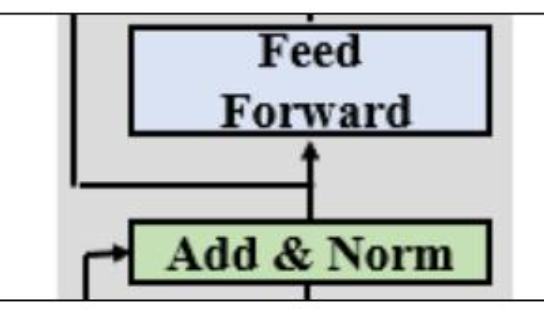

Le réseau feedforward se compose de deux couches denses avec des activations ReLU. Les paramètres du réseau feedforward sont les mêmes sur les différentes positions de la phrase et différents sur les blocs codeurs.


La sous-couche FFN peut être décrite comme suit :

* Les FFN du codeur et du décodeur sont entièrement connectés.
*  Le FFN est un réseau de positionnement. Chaque position est traitée séparément et de manière identique.

* Le FFN contient deux couches et applique une fonction d'activation ReLU.

* L'entrée et la sortie des couches FFN est dmodel = 512, mais la couche interne est plus grande avec $d_{ff} = 2048$
* Le FFN peut être considéré comme effectuant deux convolutions de taille 1 

En tenant compte de cette description, nous pouvons décrire le FFN optimisé et standardisé comme suit :
 $$FFN(x) = max(0, xW_1 + b_1)W_2 =b_2$$

La sortie du FFN va au Post-LN, comme décrit dans la section précédente. Ensuite, la sortie est envoyée à la couche suivante de la pile des encodeurs et à la couche d'attention multi-têtes de la pile des décodeurs. Explorons maintenant la pile des décodeurs

## Comprendre le décodeur d'un transformateur

Supposons que l'on veuille traduire la phrase anglaise (phrase source) I am good en francais (phrase cible) Je vais bien. Pour effectuer cette traduction, nous alimentons la phrase source I am good à l'encodeur. L'encodeur apprend la représentation de la phrase source. Dans la section précédente, nous avons appris comment exactement l'encodeur apprend la représentation de la phrase source. Maintenant, nous prenons la représentation de cet encodeur et la transmettons au décodeur. Le décodeur prend la représentation de l'encodeur en entrée et génère la phrase cible Je vais bien, comme le montre la figure suivante:


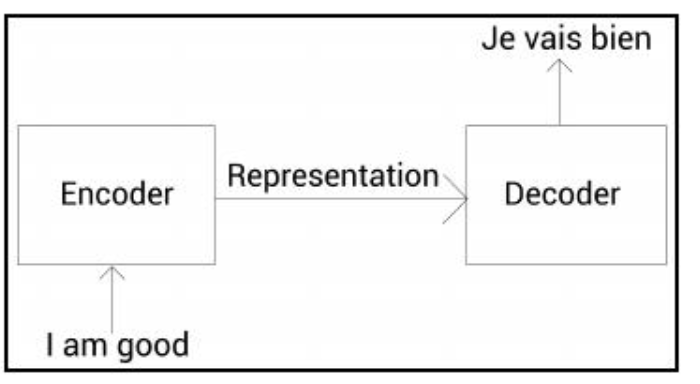

Dans la section des encodeurs, nous avons appris qu'au lieu d'avoir un seul encodeur, nous pouvons avoir une pile de N encodeurs. Semblable à l'encodeur, nous pouvons également avoir une pile de N décodeurs. Pour simplifier, posons N=2 . Comme le montre la figure suivante, la sortie d'un décodeur est l'entrée du décodeur au-dessus. On peut également observer que la représentation par le codeur de la phrase d'entrée (sortie du codeur) est envoyée à tous les décodeurs. Ainsi, un décodeur reçoit deux entrées : l'une provient du décodeur précédent, et l'autre est la représentation de l'encodeur (sortie de l'encodeur) :

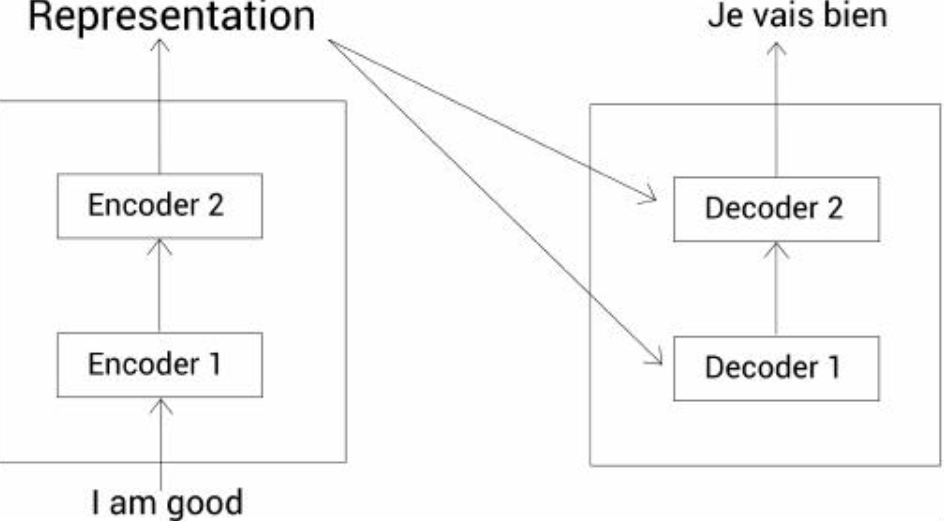

D'accord, mais comment le décodeur génère-t-il exactement la phrase cible ? Explorons cela plus en détail. Au pas de temps t=1, l'entrée du décodeur sera <sos>, ce qui indique le début de la phrase. Le décodeur prend <sos> en entrée et génère le premier mot de la phrase cible, qui est Je, comme le montre la figure suivante;

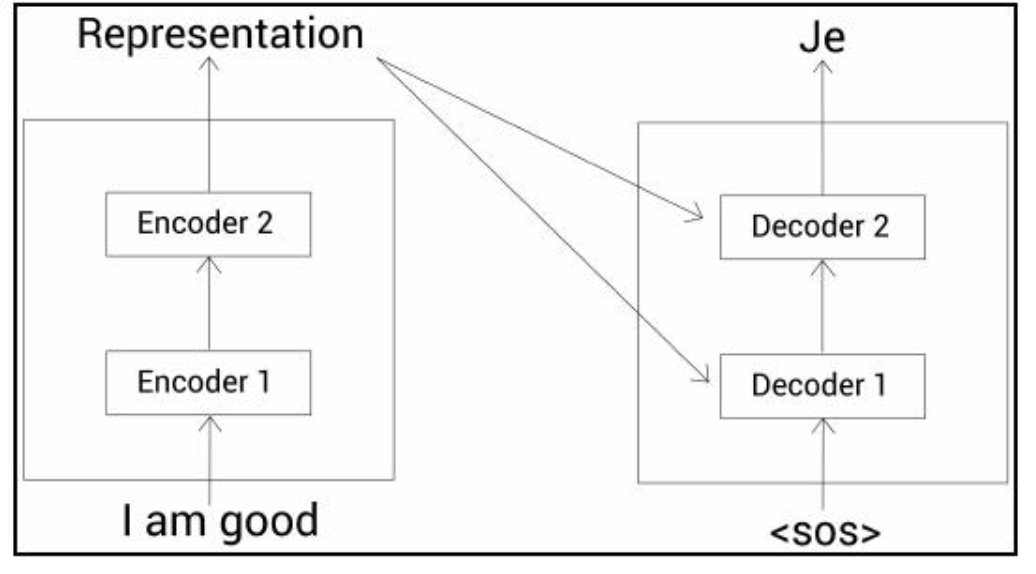

Au pas de temps t=2, avec l'entrée courante, le décodeur prend le mot nouvellement généré du pas de temps précédent t-1, , et essaie de générer le mot suivant dans cette phrase. Ainsi, le décodeur prend <sos> et Je (de l'étape précédente) en entrée et essaie de générer le mot suivant dans la phrase cible, comme le montre la figure suivante :

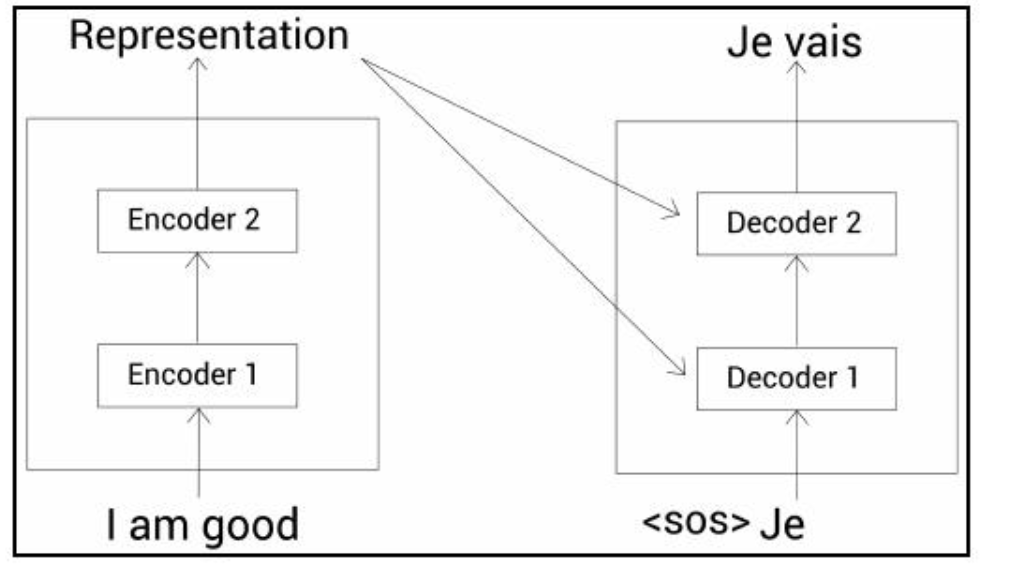

Au pas de temps t=3, avec l'entrée courante, le décodeur prend le mot nouvellement généré du pas de temps précédent,t-1, et essaie de générer le mot suivant dans cette phrase. Ainsi, le décodeur prend <sos>, Je et vais (de l'étape précédente) en entrée et essaie de générer le mot suivant dans la phrase, comme le montre la figure suivante :

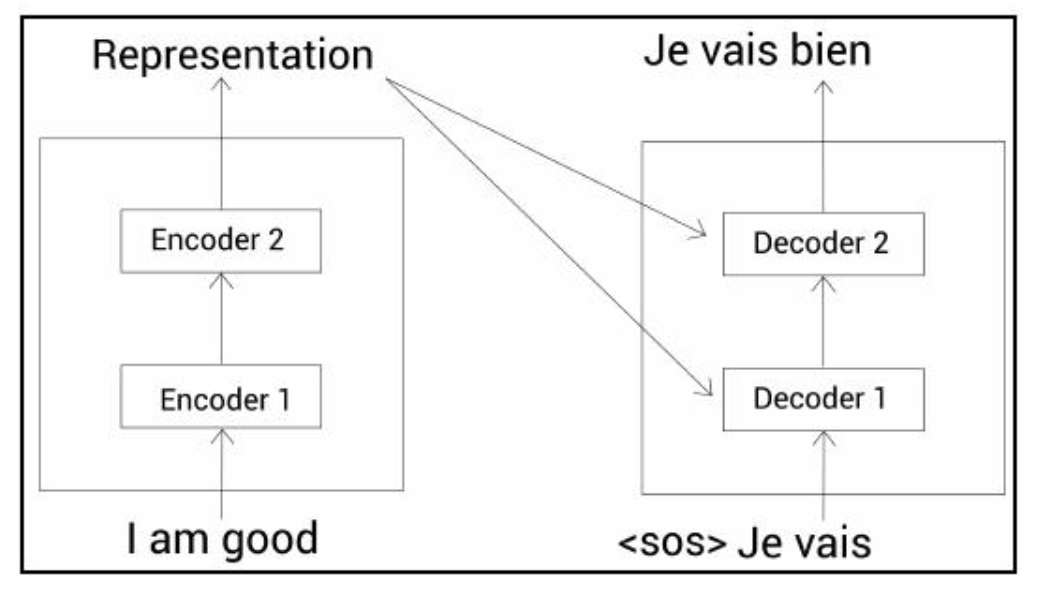

De même, à chaque pas de temps, le décodeur combine le mot nouvellement généré à l'entrée et prédit le mot suivant. Ainsi, au pas de temps t=4 , le décodeur prend <sos>, Je, vais, et bien en entrée et essaie de générer le mot suivant dans la phrase, comme le montre la figure suivante :

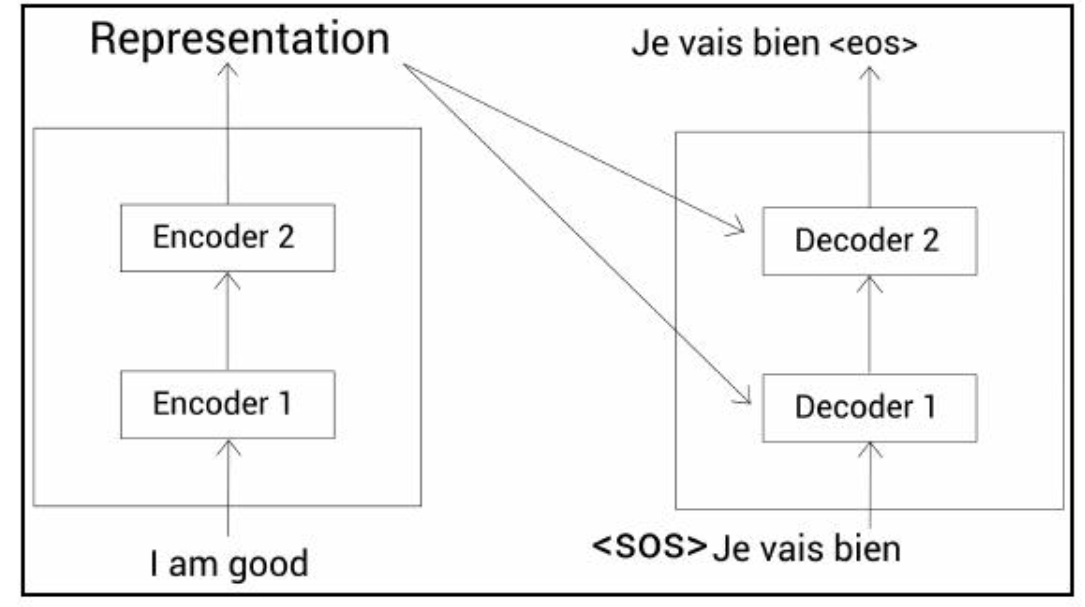

Comme on peut le constater sur la figure précédente, une fois que le jeton <eos>, qui indique la fin de la phrase, est généré, cela implique que le décodeur a terminé de générer la phrase-cible. 

Dans la section de l'encodeur, nous avons appris que nous convertissons l'entrée en une matrice d'intégration et y ajoutons l'encodage positionnel, puis l'alimentons en entrée de l'encodeur. De même, ici, au lieu d'alimenter l'entrée directement dans le décodeur, nous la convertissons en une intégration, y ajoutons l'encodage positionnel, puis l'alimentons au décodeur. 

Par exemple, comme le montre la figure suivante, disons au pas de temps t=2 nous convertissez l'entrée en un plongement (nous l'appelons un plongement de sortie car ici nous calculons le plongement des mots générés par le décodeur dans les pas de temps précédents), ajoutez-y l'encodage positionnel, puis envoyez-le au décodeur :

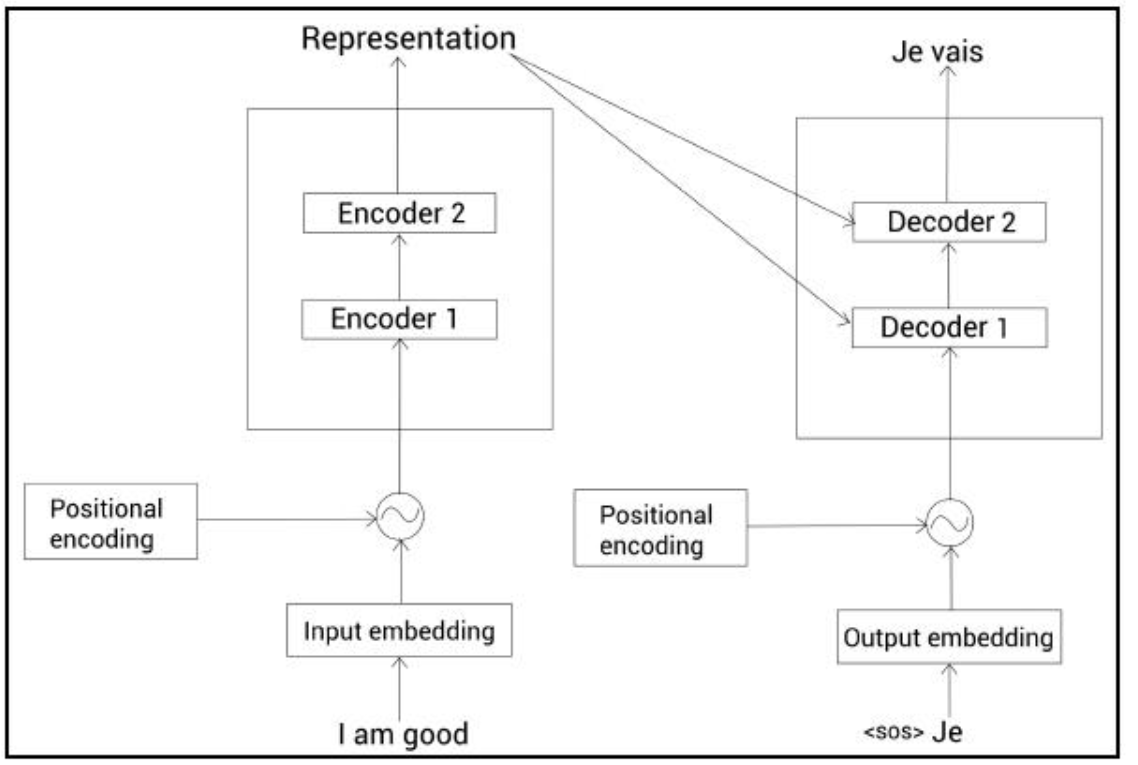

D'accord, mais la question ultime est de savoir comment fonctionne exactement le décodeur ? Que se passe-t-il à l'intérieur du décodeur ? Explorons cela en détail. Un seul bloc décodeur avec tous ses composants est illustré dans la figure suivante

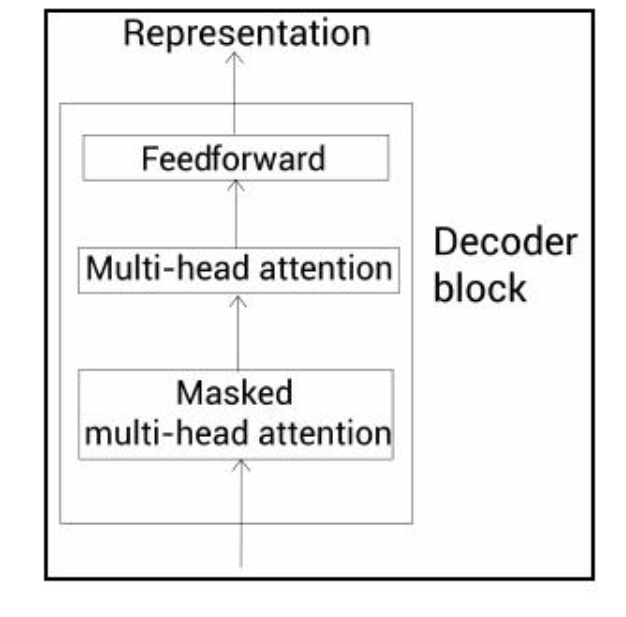

A partir de la figure précédente, nous pouvons observer que le bloc décodeur est similaire à l'encodeur et ici nous avons trois sous-couches : 

* Masked multi-head attention 
* Multi-head attention 
* Feedforward network

Semblable au bloc d'encodeur, nous avons ici des sous-couches de réseau d'attention multi-têtes et d'embedding. Cependant, nous avons ici deux sous-couches d'attention multi-têtes et l'une d'elles est masquée. Maintenant que nous avons une idée de base du décodeur, examinons d'abord chaque composant du décodeur en détail, puis nous verrons comment le décodeur fonctionne dans son ensemble.





Masked multi-head attention

Dans notre tâche de traduction anglais-français, supposons que notre ensemble de données d'entraînement ressemble à celui illustré ici :

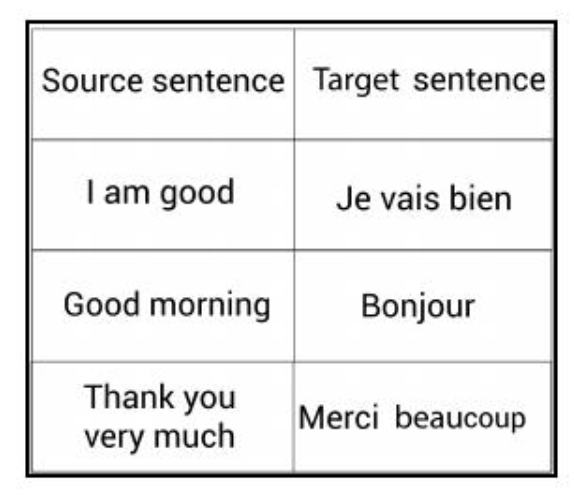



En examinant l'ensemble de données précédent, nous pouvons comprendre que nous avons des phrases source et cible. Dans la section précédente, nous avons vu comment le décodeur prédit la phrase cible mot par mot à chaque pas de temps et cela ne se produit que pendant les tests. 

Pendant l'entraînement, puisque nous avons la bonne phrase cible, nous pouvons simplement alimenter l'ensemble de la phrase cible en entrée du décodeur mais avec une petite modification. Nous avons appris que le décodeur prend l'entrée <sos> comme premier jeton et combine le mot prédit suivant à l'entrée à chaque pas de temps pour prédire la phrase cible jusqu'à ce que le jeton <eos> soit atteint. Donc, nous pouvons simplement ajouter le jeton <sos> au début de notre phrase cible et l'envoyer comme entrée au décodeur


Disons que nous convertissons la phrase anglaise I am good en phrase française Je vais bien. Nous pouvons simplement ajouter le jeton <sos> au début de la phrase cible et envoyer <sos> Je vais bien en entrée au décodeur, puis le décodeur prédit la sortie comme Je vais bien <eos>, comme le montre la figure suivante

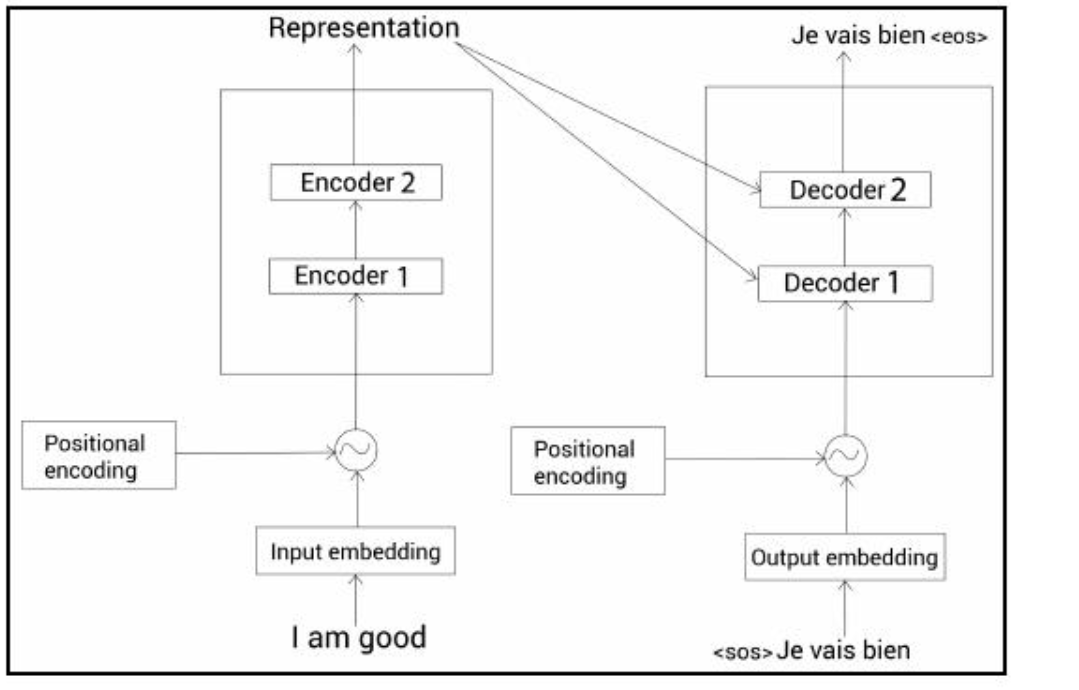

Mais comment cela fonctionne-t-il ? N'est-ce pas ce genre d'ambiguïté ? Pourquoi devons-nous alimenter la phrase cible entière et laisser le décodeur prédire la phrase cible décalée en sortie ? Explorons cela plus en détail.

Nous avons appris qu'au lieu d'envoyer l'entrée directement au décodeur, nous la convertissons en une intégration (matrice d'intégration de la sortie) et ajoutons un codage positionnel, puis l'alimentons au décodeur. Supposons que la matrice X suivante, , soit obtenue en ajoutant la matrice d'intégration de sortie et l'encodage positionnel

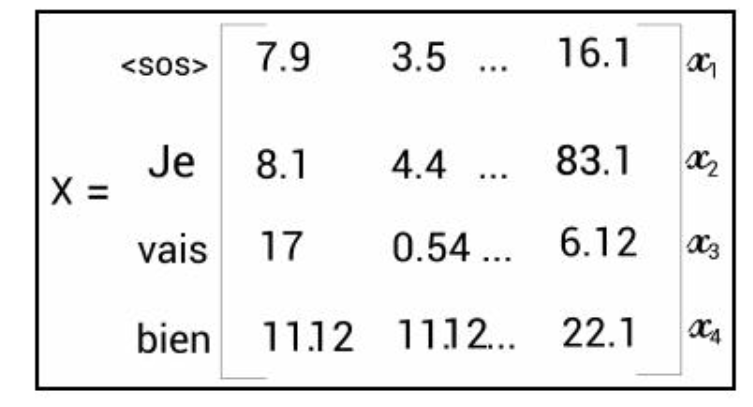

Maintenant, nous alimentons la matrice précédente,X , au décodeur. La première couche du décodeur est l'attention multi-têtes masquée. Cela fonctionne de manière similaire au mécanisme d'attention multi-têtes appris avec l'encodeur, mais avec une petite différence.


Pour effectuer self-attention, nous créons trois nouvelles matrices, appelées query, $Q$, key, $K$ et value,$V$ . Étant donné que nous calculons l'attention multi-têtes, nous créons un certain nombre de matrices de requêtes, de clés et de valeurs. Ainsi, pour une tête, , les matrices de requête, $Q_i$, clé,$K_i$ , et valeur,$V_i$ , peuvent être créées en multipliant par les matrices de poids, $W_i^Q$,$W_i^K$,$W_i^V$ respectivement.

Voyons maintenant comment fonctionne l'attention multi-têtes masquée. Notre phrase d'entrée au decoderis est  <sos> Je vais bien. Nous avons appris que le mécanisme d'auto-attention relie un mot à tous les mots de la phrase pour mieux comprendre chaque mot. Mais il y a un petit piège. Pendant le temps de test, le décodeur n'aura en entrée que les mots générés jusqu'à l'étape précédente. Par exemple, pendant le test, disons au pas de temps t=2, le décodeur n'aura que les mots d'entrée comme [<sos>, Je] et il n'aura pas d'autres mots. Donc, nous devons former notre modèle de la même manière. Ainsi, notre mécanisme d'attention devrait relier les mots seulement jusqu'au mot Je et pas les autres mots. Pour ce faire, nous pouvons masquer tous les mots à droite qui ne sont pas encore prédits par notre modèle.


Disons que nous voulons prédire le mot à côté du mot <sos>. Dans ce cas, le modèle ne doit voir que les mots jusqu'à <sos>, nous masquons donc tous les mots à droite de <sos>. Disons que nous voulons prédire le mot à côté du mot Je. Dans ce cas, le modèle ne doit voir que les mots jusqu'à Je, nous masquons donc tous les mots à droite de Je, et il en va de même pour les autres lignes, comme le montre la figure suivante

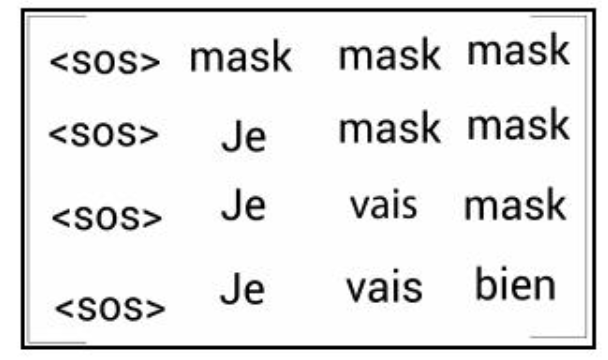

Le masquage de mots comme celui-ci aide le mécanisme de self-attention à ne s'occuper que des mots qui seraient disponibles pour le modèle pendant les tests. D'accord, mais comment pouvons-nous exactement effectuer ce masquage ? Nous savons que pour une tête, la matrice d'attention, $Z_i$, est calculée comme suit:


$$Z_i=softmax(\frac{Q_iK_i^T}{\sqrt d_k})V_i$$

La première étape du calcul de la matrice d'attention consiste à calculer le produit scalaire entre les matrices de requête et de clé. Ce qui suit montre le résultat du produit scalaire entre la requête et la matrice clé. Notez que les valeurs utilisées ici sont arbitraires, juste pour bien comprendre

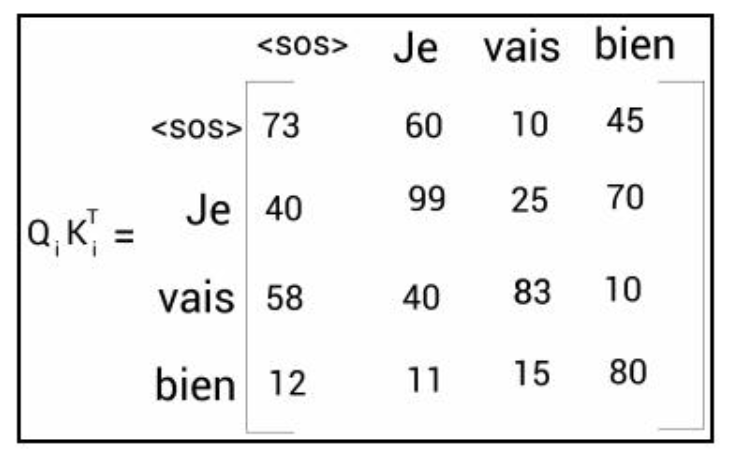

L'étape suivante consiste à diviser $Q_iK_i^T$ la matrice par la dimension du vecteur$\sqrt d_k$ clé. Supposons que ce qui suit soit le résultat 

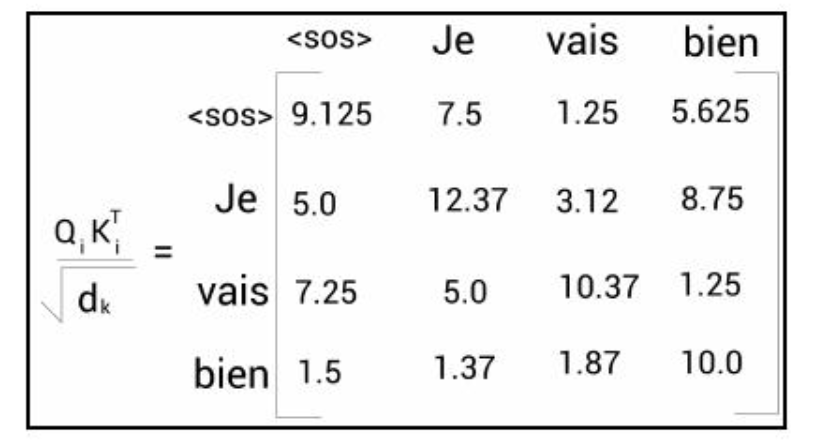

Ensuite, nous appliquons la fonction softmax à la matrice précédente et normalisons les scores. Mais avant d'appliquer la fonction softmax, nous devons masquer les valeurs. Par exemple, regardez la première ligne de notre matrice. Pour prédire le mot à côté du mot <sos>, notre modèle ne doit pas s'occuper de tous les mots à droite de <sos> (car cela ne sera pas disponible pendant le temps de test). Ainsi, nous pouvons masquer tous les mots à droite de <sos> avec $-\infty$

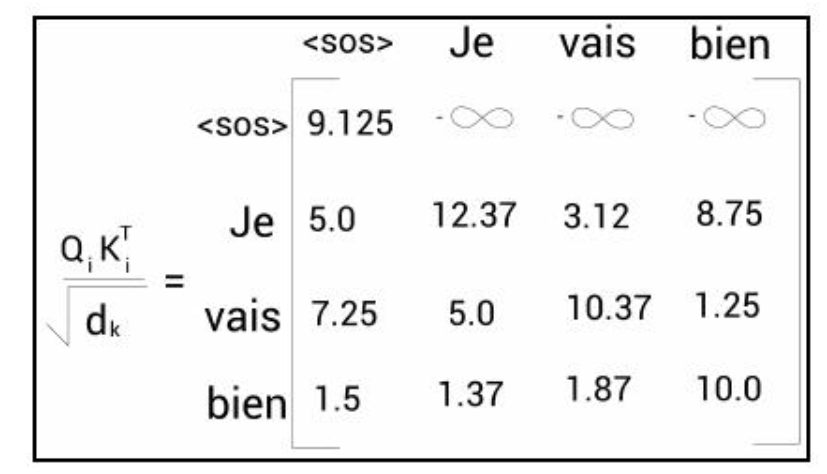

Voyons maintenant la deuxième ligne de la matrice. Pour prédire le mot à côté du mot Je, notre modèle ne doit pas prendre en compte tous les mots à droite de Je (car cela ne sera pas disponible pendant le temps de test). Ainsi, on peut masquer tous les mots à droite de Je avec :

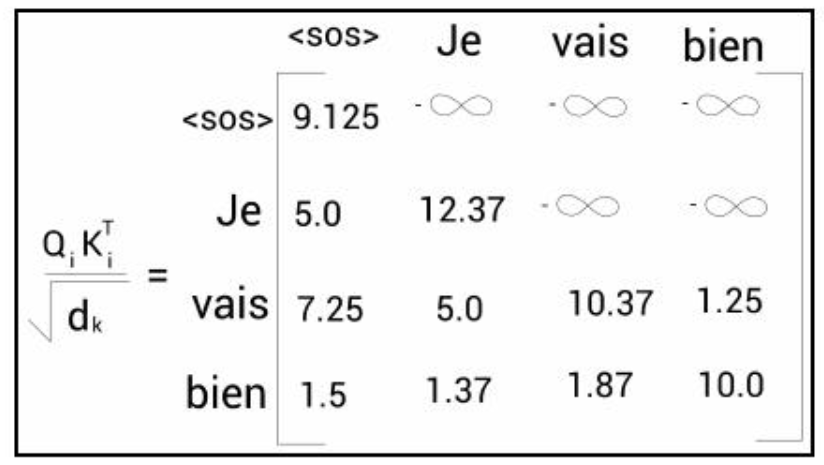

De même, on peut masquer tous les mots à droite de vais avec $-\infty$ comme indiqué

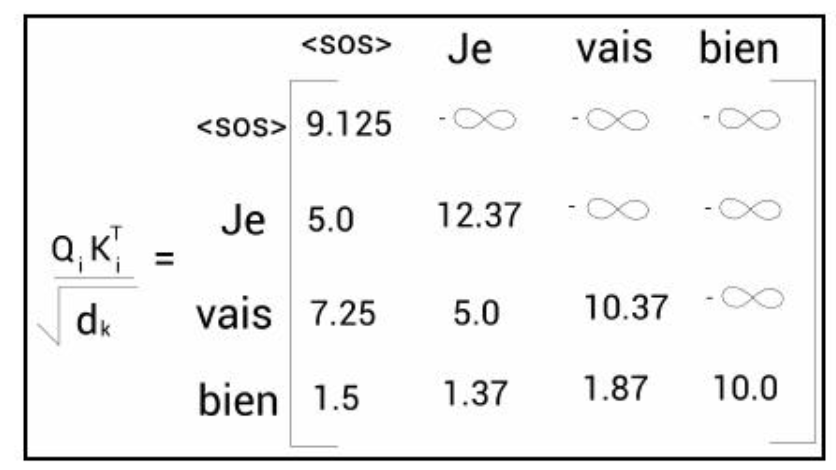

Maintenant, nous pouvons appliquer la fonction softmax à la matrice précédente et multiplier le résultat par la matrice des valeurs,$V_i$ , et obtenir la matrice d'attention finale,$Z_i$ . De même, nous pouvons calculer $h$ nombre de matrices d'attention, les concaténer et multiplier le résultat par une nouvelle matrice de poids,$W^o$ , et créer la matrice d'attention finale,$Z$ , comme indiqué.
$$Z=Concatente(Z_1, Z_2,....Z_i,....Z_h)W_0$$

Maintenant, nous transmettons cette matrice d'attention finale, , à la sous-couche suivante de notre décodeur, qui est une autre couche d'attention multi-têtes. Voyons comment cela fonctionne en détail dans la section suivante

## Multi-head attention 

La figure suivante montre le modèle de transformateur avec à la fois l'encodeur et le décodeur. Comme nous pouvons l'observer, la sous-couche d'attention multi-têtes dans chaque décodeur reçoit deux entrées : l'une provient de la sous-couche précédente, l'attention multi-têtes masquée, et l'autre est la représentation de l'encodeur.

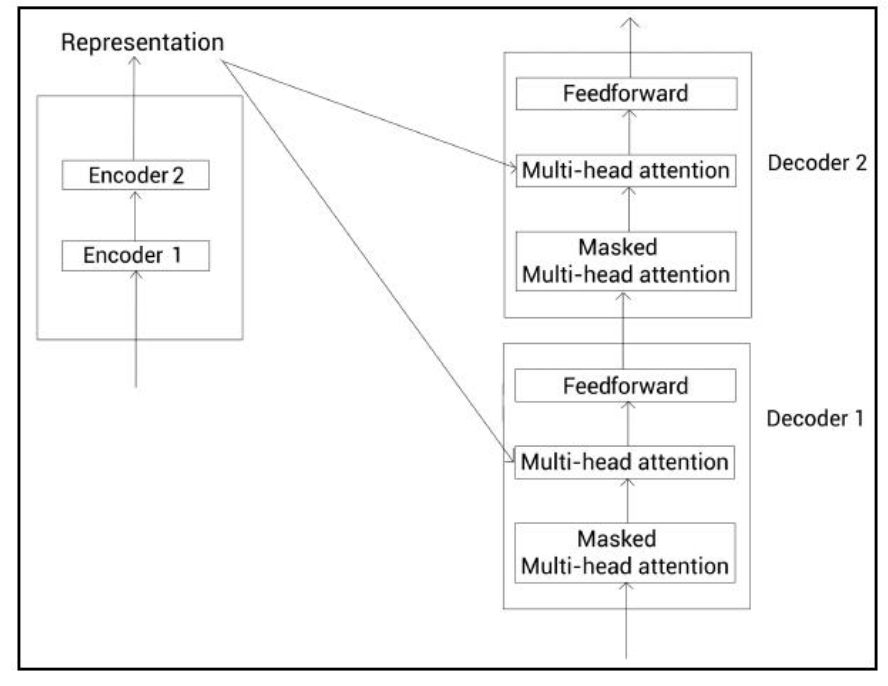


Représentons la représentation de l'encodeur par $R$ et la matrice d'attention obtenue grâce à la sous-couche d'attention multi-têtes masquée par $M$. Puisqu'il y a ici une interaction entre l'encodeur et le décodeur, cette couche est également appelée couche d'attention encodeur-décodeur.

Examinons maintenant les détails et apprenons comment fonctionne exactement cette couche d'attention multi-têtes. La première étape du mécanisme d'attention multi-têtes consiste à créer la requête, la clé et les matrices de valeurs. Nous avons appris que nous pouvons créer les matrices de requête, de clé et de valeur en multipliant la matrice d'entrée par les matrices de poids. Mais dans cette couche, nous avons deux matrices d'entrée : l'une est $R$ (la représentation du codeur) et l'autre est $R$ (la matrice d'attention de la sous-couche précédente). Alors, lequel doit-on utiliser ?


Nous créons la matrice de requête,$Q$ , en utilisant la matrice d'attention,$M$ , obtenue à partir de la sous-couche précédente et nous créons les matrices de clé et de valeur en utilisant la représentation de l'encodeur,$R$. Puisque nous exécutons le mécanisme d'attention multi-tête, pour la tête , nous procédons comme suit : 

* La matrice de requête,$Q_i$, est créée en multipliant la matrice d'attention,$M$ , par la matrice de pondération,$W_i^Q$ .

* Les matrices de clé et de valeur sont créées en multipliant la représentation de l'encodeur, $R$, par les matrices de pondération,$W_i^K$ et $W_i^V$ , respectivement. Ceci est montré dans la figure suivante:


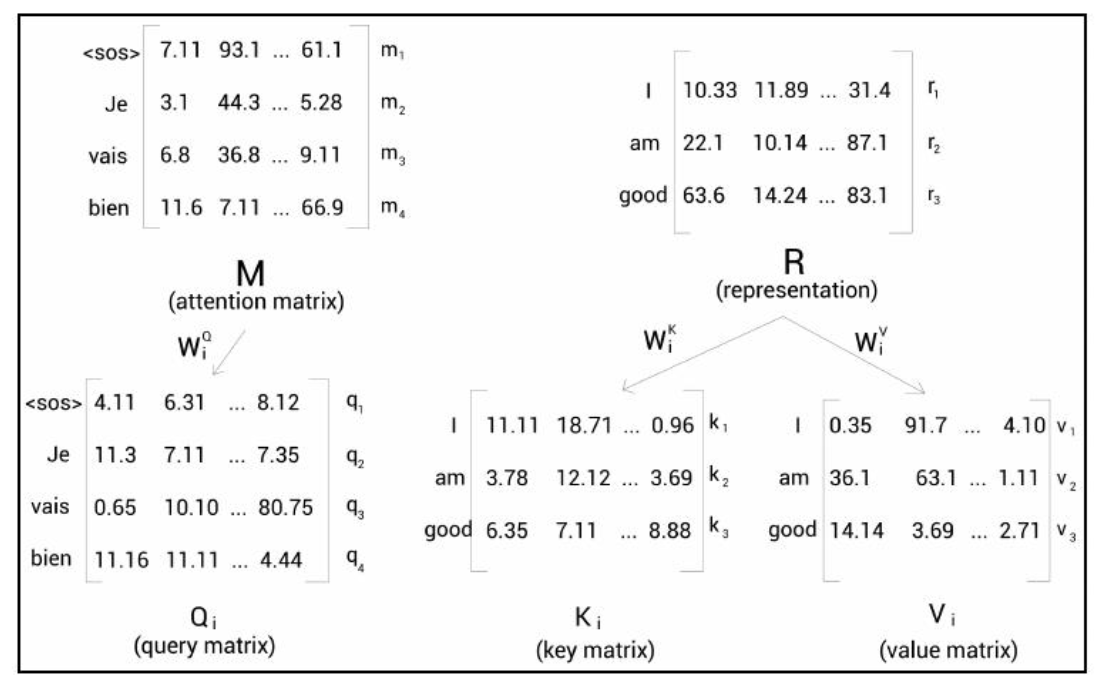

Mais pourquoi devons-nous faire cela ? Pourquoi obtient-on la matrice de requête de M et les matrices clé et valeur de R ? La matrice de requête contient essentiellement la représentation de notre phrase cible puisqu'elle est obtenue à partir de M et les matrices de clé et de valeur contiennent la représentation de la phrase source car elle est obtenue à partir de R . Mais comment et pourquoi est-ce utile exactement ? Comprenons cela en calculant l'self-attention étape par étape



La première étape de self-attention consiste à calculer le produit scalaire entre la requête et les matrices clés. La requête et les matrices de clés sont illustrées dans la figure suivante. Comme nous pouvons l'observer, puisque la matrice de requête est obtenue à partir de $M$ , elle contient la représentation de la phrase cible, et puisque la matrice clé est obtenue à partir de $R$ , elle contient la représentation de la phrase d'entrée. Notez que les valeurs utilisées ici sont arbitraires, juste pour bien comprendre

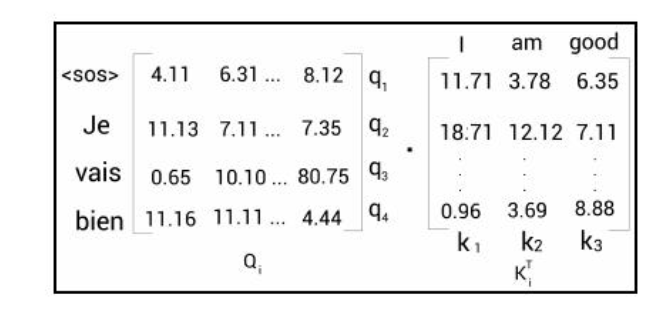

Ce qui suit montre le résultat du produit scalaire entre la requête et les matrices clés.

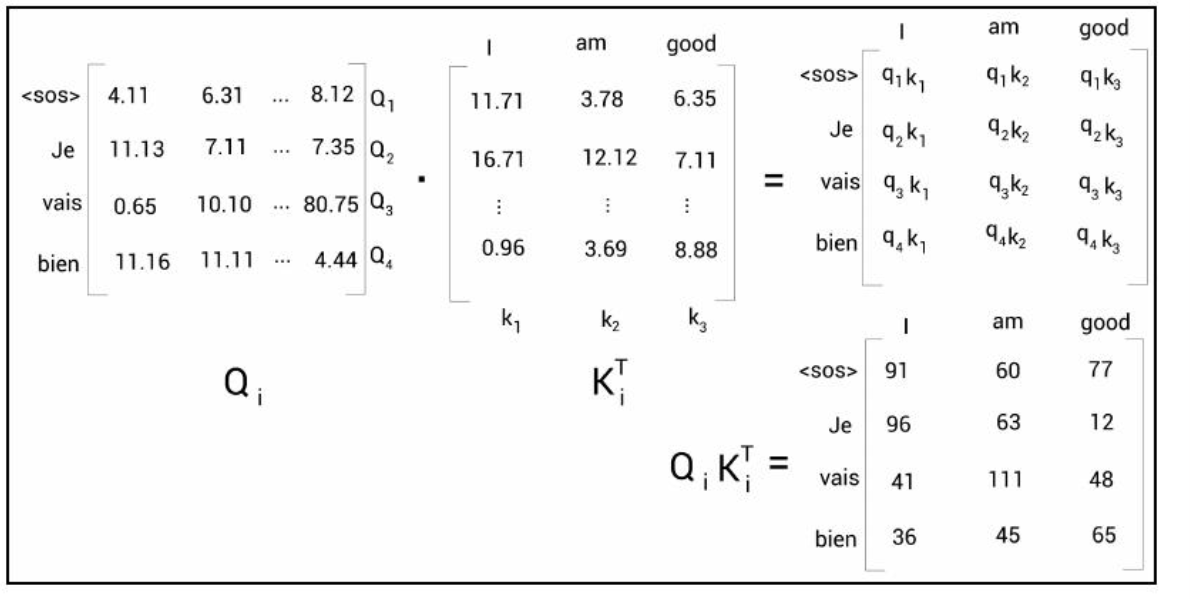


En regardant la matrice précédente,$Q_iK_i^T$ , nous pouvons comprendre ce qui suit : 

* A partir de la première ligne de la matrice, nous pouvons observer que nous calculons le produit scalaire entre le vecteur requête $q_1$ (<sos>) et tous les vecteurs clés –$k_1(I)$,$k_2 (am)$, et $k_3(good)$. Ainsi, la première ligne indique à quel point le mot cible <sos> est similaire à tous les mots de la phrase source (I, am et good)

* De même, à partir de la deuxième ligne de la matrice, nous pouvons observer que nous calculons le produit scalaire entre le vecteur de requête $q_2 (Je)$ et tous les vecteurs clés –$k_1 (I)$, $k_2(am)$ et $k_3(good)$. Ainsi, la deuxième ligne indique à quel point le mot cible Je est similaire à tous les mots de la phrase source (I, am et good)

*  La même chose s'applique à toutes les autres lignes. Ainsi, l'informatique nous aide à comprendre à quel point notre matrice de requête (représentation de la phrase cible) est similaire à la matrice clé (représentation de la phrase source)

L'étape suivante de la matrice d'attention multi-têtes $Q_iK_i^T$consiste à diviser par $\sqrt d_k$. Ensuite, nous appliquons la fonction softmax et obtenons la matrice de score,$softmax(\frac{Q_iK_i^T}{\sqrt d_k})$ .


Ensuite, nous multiplions la matrice de score par la matrice de valeur,$V_i$ , c'est-à-dire $softmax(\frac{Q_iK_i^T}{\sqrt d_k}) V_i$ , et obtenons la matrice d'attention,$Z_i , comme indiqué :

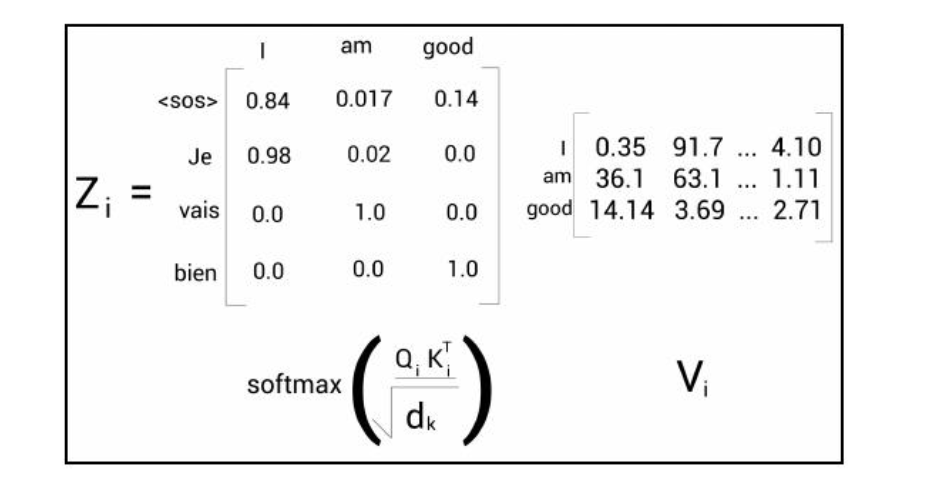

Disons que nous avons ce qui suit

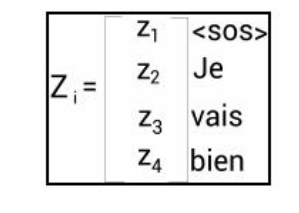

La matrice d'attention,$Z_i$ , de la phrase cible est calculée en prenant la somme des vecteurs de valeurs pondérés par les scores. Pour plus de clarté, voyons comment la valeur de self-attention du mot Je, $Z_2$ , est calculée

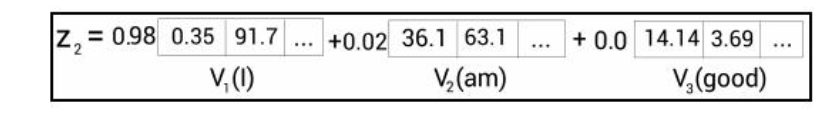

Comme indiqué, $Z_2$, self-attention du mot Je est calculée comme la somme des vecteurs de valeurs pondérés par les scores. Ainsi, la valeur de $Z_2$ contiendra 98 % des valeurs du vecteur de valeur $v_i(I)$ et 2 % des valeurs du vecteur de valeur $v_2(am)$. Cela aide essentiellement le modèle à comprendre que le mot cible Je signifie le mot source am.


De même, nous pouvons calculer le nombre $h$ de matrices d'attention, les concaténer et multiplier le résultat par une nouvelle matrice de poids,$w^0$ , et créer la matrice d'attention finale, comme indiqué:

$$Multi-head attention = Concatenate(Z_1,Z_2, ...Z_i....,Z_h)W_0$$


Maintenant, nous transmettons cette matrice d'attention finale à la sous-couche suivante de notre décodeur, qui est un réseau afeedforward . Voyons comment cela fonctionne dans la section suivante

## Feedforward network

La sous-couche suivante dans le décodeur est le réseau feedforward, comme le montre la figure suivante:

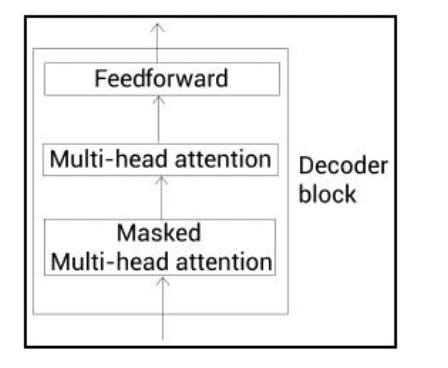

La couche feedforward dans le décodeur fonctionne exactement de la même manière que ce que nous avons appris dans l'encodeur. Ensuite, nous examinerons les composants add et norm

## Add and norm component

Tout comme nous l'avons appris avec l'encodeur, le composant add et norm connecte l'entrée et la sortie d'une sous-couche, comme le montre la figure suivante.

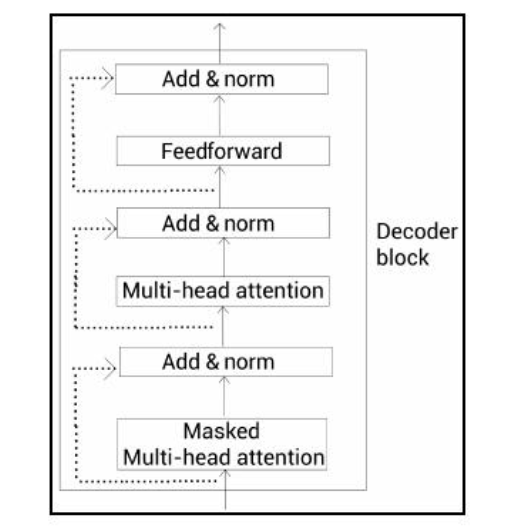

## Linear and softmax layers

Une fois que le décodeur apprend la représentation de la phrase cible, nous transmettons la sortie obtenue du décodeur le plus haut aux couches linéaire et softmax, comme indiqué dans la figure suivante:

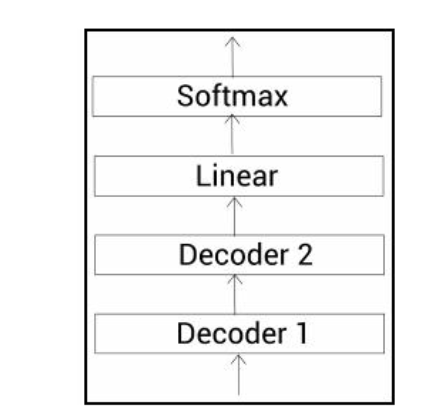

La couche linéaire génère les logits dont la taille est égale à la taille de notre vocabulaire. Supposons que notre vocabulaire se compose uniquement des trois mots suivants :

$$Vocbulary = [bien, Je , vais]$$

Maintenant, les logits renvoyés par la couche linéaire seront un vecteur de taille 3. Ensuite, nous convertissons les logits en probabilité à l'aide de la fonction softmax, puis le décodeur sort le mot dont l'indice a une valeur de probabilité élevée. Comprenons cela avec un exemple. 

Supposons que l'entrée du décodeur soit les mots <sos> et Je. Maintenant, le décodeur doit prédire le mot suivant dans notre phrase cible. Ainsi, nous prenons la sortie du décodeur le plus haut et la transmettons à la couche linéaire. La couche linéaire génère le vecteur logits dont la taille est la taille de notre vocabulaire. Soit les logits renvoyés par la couche linéaire comme suit:

$$logits = [45, 40, 49]$$

Maintenant, nous appliquons la fonction softmax aux logits générés par la couche linéaire et obtenons la probabilité

$$ prob = [0.0179, 0000,0.981]$$


A partir de la matrice précédente, nous pouvons comprendre que la probabilité est élevée à l'indice 2. Nous recherchons donc le mot qui est à l'indice 2 dans notre vocabulaire. Puisque le mot vais est à l'index 2, notre décodeur prédira le mot suivant dans notre phrase cible comme vais.

 De cette manière, le décodeur prédit le mot suivant dans la phrase cible. Maintenant que nous avons compris tous les composants du décodeur, rassemblons-les tous et voyons comment ils fonctionnent dans leur ensemble dans la section suivante.